### Covid 19 Cases Analysis (D. Cornea)

Covid 19 is a disease caused by a virus that easily spreads from person to person and affected people around the world since end of 2019. Data about the pandemic is available in different forms and it is updated every day.

The data source used for this Covid Cases analysis project is owid-covid-data.csv from the ourworldindata.org as well as the country_vaccinations.csv from kaggle.com.

According the the owid-covid-data on 15th December 2021 there were 272Mil cases recorded worldwide.

Countries with the highest number of cases include United States with 48Mil cases, India 34Mil and Brazil 22Mil.

From the data analysed correlation between new cases and new vaccines or people fully vaccinated is very weak.

However, there is a strong positive correlation between the new cases and new deaths demonstrated by a r-squared of 0.71.

Vaccination data shows that the countries with the highest number of people vaccinated are India with 781MIL people vaccinated, United States 234.6MIL and Brazil 163MIL. However, China, India and United States are the countries with the highest number of people fully vaccinated. On the other hand, the countries with the highest percentage of population vaccinated are Gibraltar, United Arab Emirates and Portugal.

When analysing the data without considering other factors, the results show that in countries like Australia the number of cases increased when the fully vaccinated population increased also. However, there are other contextual factors to be considered before drawing a conclusion on the correlation between vaccine and new cases. These factors would include lockdowns, border closure, social distancing, and others.

While considering, India, a country with high number of cases, after analysing the trend of cases versus vaccination rate, it can be noted that the new cases increased sharply at end of April and decreased in May. However, the vaccination rate was rather low when the number of cases decreased, therefore it is unlikely that the vaccination rate affected the reduced number of new cases.







In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from datetime import datetime
import requests
import numpy as np
import seaborn as sns
sns.set()
import plotly.express as px
import squarify
import scipy.stats as stats
from scipy.stats import linregress
import altair as alt
import wordcloud as wordcloud
import kaleido
import matplotlib.dates as mdates

from matplotlib import animation

import plotly.graph_objects as go

In [3]:
pd.options.display.float_format = "{:,.2f}".format  

In [4]:
# import and read owid-covid-data file

cases = pd.read_csv('./Resources/owid-covid-data.csv')
cases.head()


iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  24/02/2020         5.00       5.00   
1      AFG      Asia  Afghanistan  25/02/2020         5.00       0.00   
2      AFG      Asia  Afghanistan  26/02/2020         5.00       0.00   
3      AFG      Asia  Afghanistan  27/02/2020         5.00       0.00   
4      AFG      Asia  Afghanistan  28/02/2020         5.00       0.00   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                   37.75   
1             NaN           NaN                   37.75   
2             NaN           NaN                   37.75   
3             NaN           NaN                   37.75   
4             NaN           NaN                   37.75   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                        0.50            64.83                     0.51   
1                        0.50            64.83                     0.51   
2                        0.50            64.83                     0.51   
3                        0.50            64.83                     0.51   
4                        0.50            64.83                     0.51   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [5]:
# review the data available
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140955 entries, 0 to 140954
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    140955 non-null  object 
 1   continent                                   132039 non-null  object 
 2   location                                    140955 non-null  object 
 3   date                                        140955 non-null  object 
 4   total_cases                                 133740 non-null  float64
 5   new_cases                                   133735 non-null  float64
 6   new_cases_smoothed                          132685 non-null  float64
 7   total_deaths                                121403 non-null  float64
 8   new_deaths                                  121599 non-null  float64
 9   new_deaths_smoothed                         132685 non-null  float64
 

In [6]:
# format the date column
cases['date'] = pd.to_datetime(cases['date'])

In [7]:
# see the list with countries included in the cases dataframe
cases.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [8]:
# create a separate dataframe for the worldwide data
owid_world_df=cases.loc[cases["location"]=='World']
owid_world_df.tail()

iso_code continent location       date    total_cases  new_cases  \
139061  OWID_WRL       NaN    World 2021-11-12 269,739,121.00 488,565.00   
139062  OWID_WRL       NaN    World 2021-12-12 270,159,882.00 420,761.00   
139063  OWID_WRL       NaN    World 2021-12-13 270,795,523.00 635,641.00   
139064  OWID_WRL       NaN    World 2021-12-14 271,469,226.00 673,703.00   
139065  OWID_WRL       NaN    World 2021-12-15 272,205,417.00 736,191.00   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
139061          613,910.29  5,301,760.00    5,709.00             7,558.43   
139062          611,636.43  5,306,078.00    4,318.00             7,151.43   
139063          617,638.29  5,312,553.00    6,475.00             7,073.29   
139064          615,150.00  5,320,822.00    8,269.00             7,084.86   
139065          624,439.43  5,329,879.00    9,057.00             7,239.57   

        ...  female_smokers  male_smokers  handwashing_facilities  \
139061  ...            6.43         34.63                   60.13   
139062  ...            6.43         34.63                   60.13   
139063  ...            6.43         34.63                   60.13   
139064  ...            6.43         34.63                   60.13   
139065  ...            6.43         34.63                   60.13   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
139061                        2.71            72.58                     0.74   
139062                        2.71            72.58                     0.74   
139063                        2.71            72.58                     0.74   
139064                        2.71            72.58                     0.74   
139065                        2.71            72.58                     0.74   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
139061                                   NaN                          NaN   
139062                                   NaN                          NaN   
139063                                   NaN                          NaN   
139064                                   NaN                          NaN   
139065                                   NaN                          NaN   

        excess_mortality  excess_mortality_cumulative_per_million  
139061               NaN                                      NaN  
139062               NaN                                      NaN  
139063               NaN                                      NaN  
139064               NaN                                      NaN  
139065               NaN                                      NaN  

[5 rows x 67 columns]

In [9]:
# replace NaN values with zero
owid_world_df = owid_world_df.replace(np.nan, 0)
owid_world_df.head()

iso_code  continent location       date  total_cases  new_cases  \
138372  OWID_WRL          0    World 2020-01-22       557.00       0.00   
138373  OWID_WRL          0    World 2020-01-23       655.00      98.00   
138374  OWID_WRL          0    World 2020-01-24       941.00     286.00   
138375  OWID_WRL          0    World 2020-01-25     1,434.00     493.00   
138376  OWID_WRL          0    World 2020-01-26     2,118.00     684.00   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
138372                0.00         17.00        0.00                 0.00   
138373                0.00         18.00        1.00                 0.00   
138374                0.00         26.00        8.00                 0.00   
138375                0.00         42.00       16.00                 0.00   
138376                0.00         56.00       14.00                 0.00   

        ...  female_smokers  male_smokers  handwashing_facilities  \
138372  ...            6.43         34.63                   60.13   
138373  ...            6.43         34.63                   60.13   
138374  ...            6.43         34.63                   60.13   
138375  ...            6.43         34.63                   60.13   
138376  ...            6.43         34.63                   60.13   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
138372                        2.71            72.58                     0.74   
138373                        2.71            72.58                     0.74   
138374                        2.71            72.58                     0.74   
138375                        2.71            72.58                     0.74   
138376                        2.71            72.58                     0.74   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
138372                                  0.00                         0.00   
138373                                  0.00                         0.00   
138374                                  0.00                         0.00   
138375                                  0.00                         0.00   
138376                                  0.00                         0.00   

        excess_mortality  excess_mortality_cumulative_per_million  
138372              0.00                                     0.00  
138373              0.00                                     0.00  
138374              0.00                                     0.00  
138375              0.00                                     0.00  
138376              0.00                                     0.00  

[5 rows x 67 columns]

In [10]:
# worldwide cases data to 15/12/21
owid_world_df.describe()

continent    total_cases  new_cases  new_cases_smoothed  total_deaths  \
count     694.00         694.00     694.00              694.00        694.00   
mean        0.00 101,254,849.24 391,364.63          388,634.11  2,240,322.09   
std         0.00  89,233,034.62 234,877.58          227,333.29  1,755,554.37   
min         0.00         557.00       0.00                0.00         17.00   
25%         0.00  13,170,762.25 213,944.00          212,312.04    603,701.25   
50%         0.00  85,164,001.50 415,324.50          416,758.71  1,902,615.50   
75%         0.00 180,780,953.25 571,593.75          585,084.64  3,910,972.50   
max         0.00 272,205,417.00 908,289.00          827,219.86  5,329,879.00   

       new_deaths  new_deaths_smoothed  total_cases_per_million  \
count      694.00               694.00                   694.00   
mean     7,655.55             7,623.80                12,857.81   
std      3,831.80             3,538.69                11,331.23   
min          0.00                 0.00                     0.07   
25%      5,422.00             5,489.54                 1,672.49   
50%      7,403.50             7,356.29                10,814.52   
75%     10,147.25            10,025.82                22,956.41   
max     18,007.00            14,703.29                34,565.92   

       new_cases_per_million  new_cases_smoothed_per_million  ...  \
count                 694.00                          694.00  ...   
mean                   49.70                           49.35  ...   
std                    29.83                           28.87  ...   
min                     0.00                            0.00  ...   
25%                    27.17                           26.96  ...   
50%                    52.74                           52.92  ...   
75%                    72.58                           74.30  ...   
max                   115.34                          105.04  ...   

       female_smokers  male_smokers  handwashing_facilities  \
count          694.00        694.00                  694.00   
mean             6.43         34.63                   60.13   
std              0.00          0.00                    0.00   
min              6.43         34.63                   60.13   
25%              6.43         34.63                   60.13   
50%              6.43         34.63                   60.13   
75%              6.43         34.63                   60.13   
max              6.43         34.63                   60.13   

       hospital_beds_per_thousand  life_expectancy  human_development_index  \
count                      694.00           694.00                   694.00   
mean                         2.70            72.58                     0.74   
std                          0.00             0.00                     0.00   
min                          2.71            72.58                     0.74   
25%                          2.71            72.58                     0.74   
50%                          2.71            72.58                     0.74   
75%                          2.71            72.58                     0.74   
max                          2.71            72.58                     0.74   

       excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
count                                694.00                       694.00   
mean                                   0.00                         0.00   
std                                    0.00                         0.00   
min                                    0.00                         0.00   
25%                                    0.00                         0.00   
50%                                    0.00                         0.00   
75%                                    0.00                         0.00   
max                                    0.00                         0.00   

       excess_mortality  excess_mortality_cumulative_per_million  
count            694.00     

In [11]:
owid_world_df.groupby("date")
owid_world_c_df= owid_world_df[["new_cases", "new_vaccinations", "people_fully_vaccinated", "new_deaths", "total_deaths","date", "total_cases"]]

print(owid_world_c_df.corr().to_string())

                         new_cases  new_vaccinations  people_fully_vaccinated  new_deaths  total_deaths  total_cases
new_cases                     1.00              0.52                     0.33        0.84          0.68         0.66
new_vaccinations              0.52              1.00                     0.71        0.35          0.89         0.89
people_fully_vaccinated       0.33              0.71                     1.00        0.07          0.80         0.83
new_deaths                    0.84              0.35                     0.07        1.00          0.49         0.46
total_deaths                  0.68              0.89                     0.80        0.49          1.00         1.00
total_cases                   0.66              0.89                     0.83        0.46          1.00         1.00


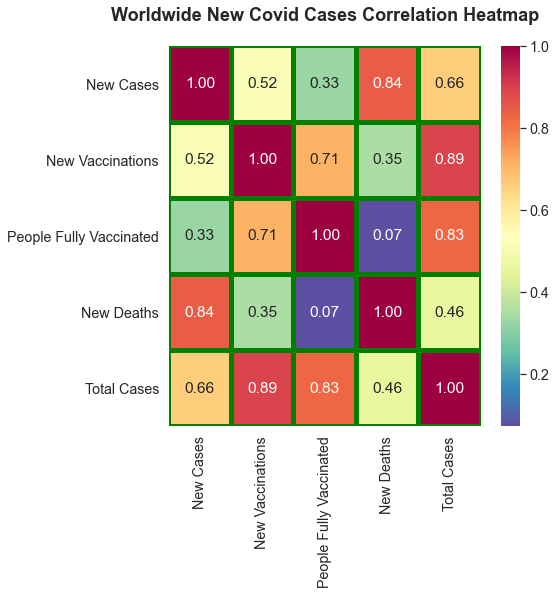

In [12]:
# worldwide cases vs vaccination and deaths
sns.set(font_scale=1.3)

plt.rcParams['figure.figsize'] = [7, 7]

x_labels = ["New Cases", "New Vaccinations","People Fully Vaccinated", "New Deaths", "Total Cases"]
y_labels = ["New Cases", "New Vaccinations","People Fully Vaccinated", "New Deaths", "Total Cases"]
sns.heatmap(owid_world_c_df.drop('total_deaths', axis=1).corr(), xticklabels=x_labels, yticklabels=y_labels, annot=True, fmt='.2f', cmap='Spectral_r', linewidths=4, linecolor='green');

plt.title('Worldwide New Covid Cases Correlation Heatmap', y=1.05, fontsize=18, fontweight="bold")
plt.savefig("DC Output/DC Figures/Fig DC Worldwide New Covid Cases Correlation Heatmap", dpi='figure',bbox_inches='tight') 

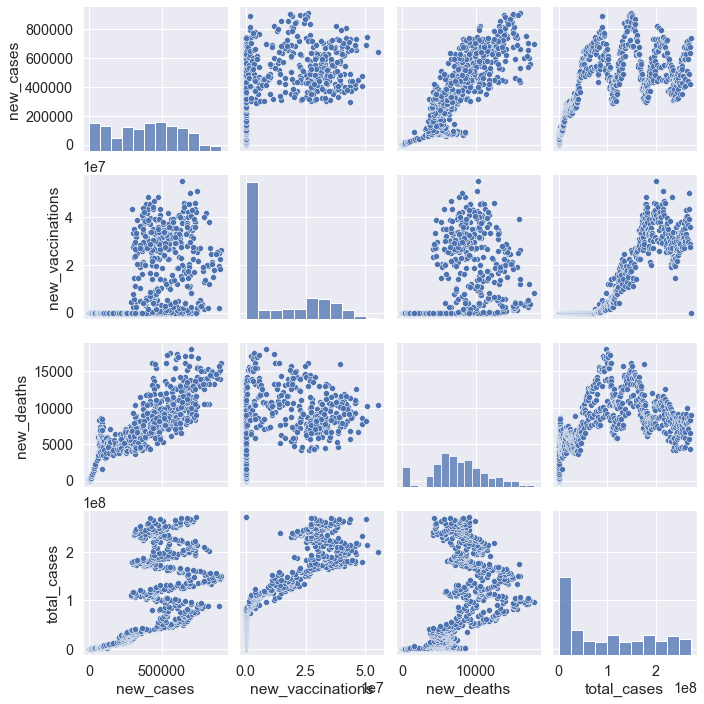

In [13]:
# correlations various variables

sns.pairplot(owid_world_c_df, vars = ['new_cases', 'new_vaccinations', 'new_deaths', "total_cases"]);

The r-squared is: 0.2675118134940677


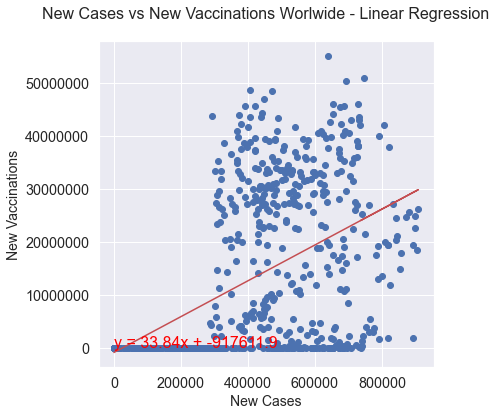

In [14]:
# correlation between new cases and new vaccinations worldwide
plt.rcParams['figure.figsize'] = [6, 6]
x_values = owid_world_c_df["new_cases"]
y_values = owid_world_c_df["new_vaccinations"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('New Cases', fontsize=14)
plt.ylabel('New Vaccinations', fontsize=14)
plt.title('New Cases vs New Vaccinations Worlwide - Linear Regression', y=1.05, fontsize=16)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Cases vs New Vaccinations Worlwide - Linear Regression", dpi='figure',bbox_inches='tight')
plt.show()

The r-squared is: 0.12538362118278865


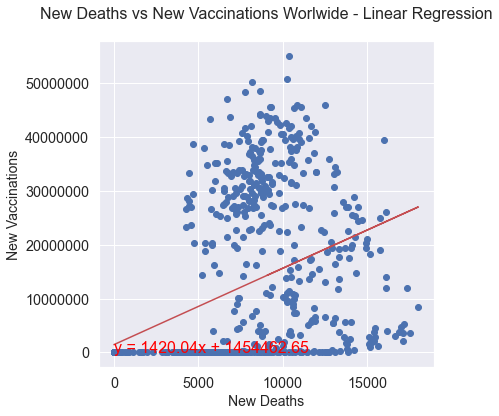

In [15]:
# correlation between new deaths and new vaccinations worldwide
plt.rcParams['figure.figsize'] = [6, 6]
x_values = owid_world_c_df["new_deaths"]
y_values = owid_world_c_df["new_vaccinations"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('New Deaths', fontsize=14)
plt.ylabel('New Vaccinations', fontsize=14)
plt.title('New Deaths vs New Vaccinations Worlwide - Linear Regression', y=1.05, fontsize=16)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Deaths vs New Vaccinations Worlwide - Linear Regression", dpi='figure',bbox_inches='tight')
plt.show()

The r-squared is: 0.7134251547294537


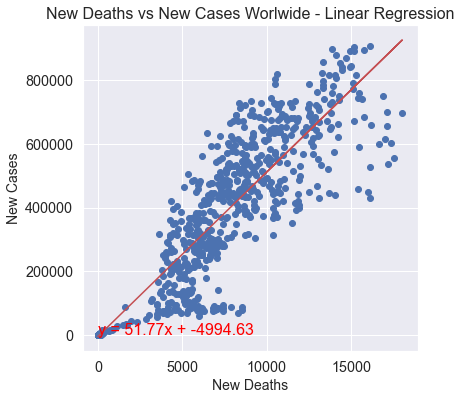

In [16]:
# correlation between new cases and new vaccinations
plt.rcParams['figure.figsize'] = [6, 6]
x_values = owid_world_c_df["new_deaths"]
y_values = owid_world_c_df["new_cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('New Deaths', fontsize=14)
plt.ylabel('New Cases', fontsize=14)

plt.title('New Deaths vs New Cases Worlwide - Linear Regression', fontsize=16)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Deaths vs New Cases Worlwide - Linear Regression", dpi='figure',bbox_inches='tight')
plt.show()

In [17]:
new_cases_owid_world_df=owid_world_df["new_cases"]


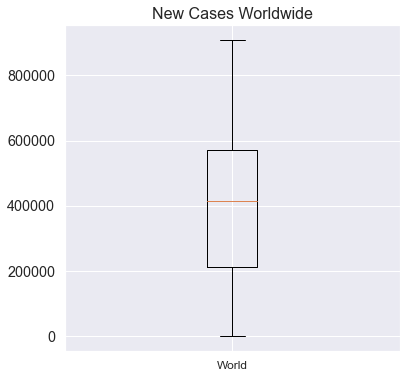

In [18]:
# Generate a box plot of for new cases worldwide

data_to_plot = [new_cases_owid_world_df
                ]

fig1, ax1 = plt.subplots()

ax1.set_title('New Cases Worldwide', fontsize=16)

ax1.boxplot(data_to_plot)


plt.xticks([1], ['World'], rotation=0, fontsize=12)


plt.savefig("DC Output/DC Figures/Fig DC Box Plot New Cases Worldwide.png", bbox_inches="tight")

plt.show()

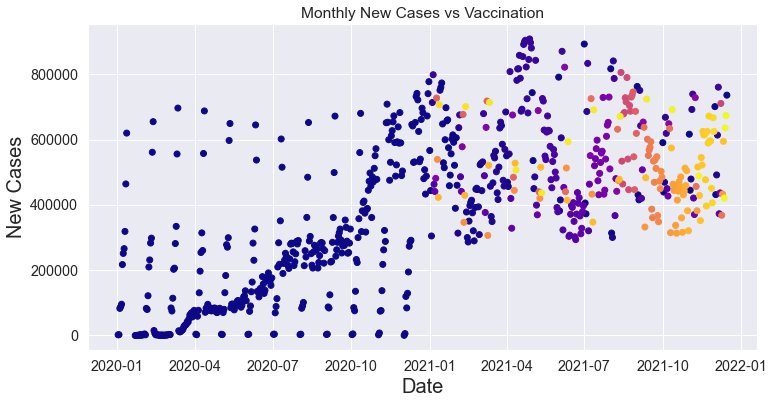

In [19]:
# scatter plot worldwide new cases 
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(data=owid_world_df, x='date', y='new_cases', c='people_fully_vaccinated', cmap='plasma')
ax.set(title='Monthly New Cases vs Vaccination', xlabel='Date', ylabel='New Cases')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
fig.savefig("DC Output/DC Figures/Fig DC Monthly New Cases Worldwide", dpi='figure',bbox_inches='tight') 
plt.show()

In [20]:
# plot monthly worlwide data
px.scatter(owid_world_df, x='date', y='new_cases', size="new_cases", color='people_fully_vaccinated',
                title="Monthly New Cases vs People Fully Vaccinated Worldwide")

#plt.savefig("DC Output/DC Figures/Fig DC Monthly New Cases vs People Fully Vaccinated Worldwide.png", bbox_inches="tight")

In [21]:
# plot monthly worlwide data
px.scatter(owid_world_df, x='date', y='new_cases', size="new_cases", color='new_deaths',
                title="Monthly New Cases vs New Deaths Worldwide")

#plt.savefig("DC Output/DC Figures/Fig DC Monthly New Cases vs New Deaths Worldwide.png", bbox_inches="tight")

In [22]:
# import vaccination file
vaccination_path = "country_vaccinations.csv"
vaccination = pd.read_csv(vaccination_path)
vaccination.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                0.00               0.00   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN            1,367.00   
2                      NaN                     NaN            1,367.00   
3                      NaN                     NaN            1,367.00   
4                      NaN                     NaN            1,367.00   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.00                           0.00   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                           34.00   
2                                  NaN                           34.00   
3                                  NaN                           34.00   
4                                  NaN                           34.00   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name  \
0  World Health Organization   
1  World Health Organization   
2  World Health Organization   
3  World Health Organization   
4  World Health Organization   

                                      source_website  
0  https://reliefweb.int/sites/reliefweb.int/file...  
1  https://reliefweb.int/sites/reliefweb.int/file...  
2  https://reliefweb.int/sites/reliefweb.int/file...  
3  https://reliefweb.int/sites/reliefweb.int/file...  
4  https://reliefweb.int/sites/reliefweb.int/file...

In [23]:
# format the date columns
vaccination['date'] = pd.to_datetime(vaccination['date'])

In [24]:
# merge the cases and vaccination files by country code and date
cases_vaccination = pd.merge(cases, vaccination, on=['iso_code', 'date'], how='inner')
cases_vaccination.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2021-03-01    52,709.00     123.00   
1      AFG      Asia  Afghanistan 2021-04-01    52,909.00     200.00   
2      AFG      Asia  Afghanistan 2021-05-01    53,011.00     102.00   
3      AFG      Asia  Afghanistan 2021-06-01    53,105.00      94.00   
4      AFG      Asia  Afghanistan 2021-07-01    53,207.00     102.00   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0              123.00      2,221.00       10.00                 9.00  ...   
1              128.86      2,230.00        9.00                 8.57  ...   
2              123.43      2,237.00        7.00                 7.86  ...   
3              110.71      2,244.00        7.00                 7.86  ...   
4              125.29      2,253.00        9.00                 9.14  ...   

   people_fully_vaccinated_y  daily_vaccinations_raw  daily_vaccinations  \
0                        NaN                     NaN            1,580.00   
1                        NaN                     NaN            3,000.00   
2                        NaN                     NaN           13,921.00   
3                        NaN                     NaN            5,102.00   
4                        NaN                     NaN           14,115.00   

   total_vaccinations_per_hundred_y  people_vaccinated_per_hundred_y  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   people_fully_vaccinated_per_hundred_y  daily_vaccinations_per_million  \
0                                    NaN                           40.00   
1                                    NaN                           75.00   
2                                    NaN                          349.00   
3                                    NaN                          128.00   
4                                    NaN                          354.00   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name  \
0  World Health Organization   
1  World Health Organization   
2  World Health Organization   
3  World Health Organization   
4  World Health Organization   

                                      source_website  
0  https://reliefweb.int/sites/reliefweb.int/file...  
1  https://reliefweb.int/sites/reliefweb.int/file...  
2  https://reliefweb.int/sites/reliefweb.int/file...  
3  https://reliefweb.int/sites/reliefweb.int/file...  
4  https://reliefweb.int/sites/reliefweb.int/file...  

[5 rows x 80 columns]

In [25]:
# export merged dataframe to a CSV file
compression_opts = dict(method='zip',
                        archive_name='DC_cases_vaccines.csv')  
cases_vaccination.to_csv('./DC Output/DC_cases_vaccination_merged.zip', index=False,
          compression=compression_opts)  

In [26]:
# replace NaN values with zero
cases_vaccination = cases_vaccination.replace(np.nan, 0)
cases_vaccination.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2021-03-01    52,709.00     123.00   
1      AFG      Asia  Afghanistan 2021-04-01    52,909.00     200.00   
2      AFG      Asia  Afghanistan 2021-05-01    53,011.00     102.00   
3      AFG      Asia  Afghanistan 2021-06-01    53,105.00      94.00   
4      AFG      Asia  Afghanistan 2021-07-01    53,207.00     102.00   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0              123.00      2,221.00       10.00                 9.00  ...   
1              128.86      2,230.00        9.00                 8.57  ...   
2              123.43      2,237.00        7.00                 7.86  ...   
3              110.71      2,244.00        7.00                 7.86  ...   
4              125.29      2,253.00        9.00                 9.14  ...   

   people_fully_vaccinated_y  daily_vaccinations_raw  daily_vaccinations  \
0                       0.00                    0.00            1,580.00   
1                       0.00                    0.00            3,000.00   
2                       0.00                    0.00           13,921.00   
3                       0.00                    0.00            5,102.00   
4                       0.00                    0.00           14,115.00   

   total_vaccinations_per_hundred_y  people_vaccinated_per_hundred_y  \
0                              0.00                             0.00   
1                              0.00                             0.00   
2                              0.00                             0.00   
3                              0.00                             0.00   
4                              0.00                             0.00   

   people_fully_vaccinated_per_hundred_y  daily_vaccinations_per_million  \
0                                   0.00                           40.00   
1                                   0.00                           75.00   
2                                   0.00                          349.00   
3                                   0.00                          128.00   
4                                   0.00                          354.00   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name  \
0  World Health Organization   
1  World Health Organization   
2  World Health Organization   
3  World Health Organization   
4  World Health Organization   

                                      source_website  
0  https://reliefweb.int/sites/reliefweb.int/file...  
1  https://reliefweb.int/sites/reliefweb.int/file...  
2  https://reliefweb.int/sites/reliefweb.int/file...  
3  https://reliefweb.int/sites/reliefweb.int/file...  
4  https://reliefweb.int/sites/reliefweb.int/file...  

[5 rows x 80 columns]

In [27]:
# mergded dataframe columns information
cases_vaccination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61356 entries, 0 to 61355
Data columns (total 80 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    61356 non-null  object        
 1   continent                                   61356 non-null  object        
 2   location                                    61356 non-null  object        
 3   date                                        61356 non-null  datetime64[ns]
 4   total_cases                                 61356 non-null  float64       
 5   new_cases                                   61356 non-null  float64       
 6   new_cases_smoothed                          61356 non-null  float64       
 7   total_deaths                                61356 non-null  float64       
 8   new_deaths                                  61356 non-null  float64       
 9   new_de

In [28]:
# add column for population in millions
cases_vaccination["population_mil"]=cases_vaccination["population"]/1000000

# add new column for calculated vaccinations rate 
cases_vaccination["vaccination_rate"]=cases_vaccination["people_fully_vaccinated_y"]/cases_vaccination["population"]

# find the maximum cases for each country
cases_vaccination['max_cases'] = cases_vaccination.groupby('country')["total_cases"].transform('max')

# find the maximum vaccination for each country
cases_vaccination['max_vaccinated'] = cases_vaccination.groupby('country')["people_fully_vaccinated_y"].transform('max')

# add column for cases % of population
cases_vaccination["cases_per_hundred"]=cases_vaccination["max_cases"]/(cases_vaccination["population"]/100)

# add column for month
cases_vaccination["month"]=cases_vaccination["date"].dt.month

# add column for year
cases_vaccination["year"]=cases_vaccination["date"].dt.year

# add new column for calculated vaccinations rate 
cases_vaccination["vaccination_per_hundred"]=cases_vaccination["max_vaccinated"]/(cases_vaccination["population"]/100)

# add new column for cases per vaccination 
cases_vaccination["cases_per_vaccination"]=cases_vaccination["cases_per_hundred"]/(cases_vaccination["vaccination_per_hundred"])

# add new column for cases per vaccination 
cases_vaccination['max_deaths'] = cases_vaccination.groupby('country')["total_deaths"].transform('max')



In [29]:
# see the list with countries included in the merged dataframe
cases_vaccination.iso_code.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD',
       'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'EST',
       'SWZ', 'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM',
       'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS',
       'MEX', '

In [30]:
# exclude rows with description containing OWID_ as country ID
cases_vaccination[cases_vaccination["iso_code"].str.contains("OWID_")==False]

iso_code continent     location       date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan 2021-03-01    52,709.00     123.00   
1          AFG      Asia  Afghanistan 2021-04-01    52,909.00     200.00   
2          AFG      Asia  Afghanistan 2021-05-01    53,011.00     102.00   
3          AFG      Asia  Afghanistan 2021-06-01    53,105.00      94.00   
4          AFG      Asia  Afghanistan 2021-07-01    53,207.00     102.00   
...        ...       ...          ...        ...          ...        ...   
61351      ZWE    Africa     Zimbabwe 2021-07-12   141,601.00   2,555.00   
61352      ZWE    Africa     Zimbabwe 2021-08-12   150,628.00   9,027.00   
61353      ZWE    Africa     Zimbabwe 2021-09-12   155,817.00   5,189.00   
61354      ZWE    Africa     Zimbabwe 2021-10-12   155,817.00       0.00   
61355      ZWE    Africa     Zimbabwe 2021-11-12   165,002.00   9,185.00   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                  123.00      2,221.00       10.00                 9.00  ...   
1                  128.86      2,230.00        9.00                 8.57  ...   
2                  123.43      2,237.00        7.00                 7.86  ...   
3                  110.71      2,244.00        7.00                 7.86  ...   
4                  125.29      2,253.00        9.00                 9.14  ...   
...                   ...           ...         ...                  ...  ...   
61351              996.57      4,713.00        3.00                 0.86  ...   
61352            2,184.43      4,720.00        7.00                 1.86  ...   
61353            2,776.86      4,723.00        3.00                 2.29  ...   
61354            2,625.14      4,723.00        0.00                 2.14  ...   
61355            3,782.71      4,735.00       12.00                 3.71  ...   

       population_mil  vaccination_rate  max_cases  max_vaccinated  \
0               39.84              0.00 157,858.00    3,566,192.00   
1               39.84              0.00 157,858.00    3,566,192.00   
2               39.84              0.00 157,858.00    3,566,192.00   
3               39.84              0.00 157,858.00    3,566,192.00   
4               39.84              0.00 157,858.00    3,566,192.00   
...               ...               ...        ...             ...   
61351           15.09              0.04 165,002.00    2,961,011.00   
61352           15.09              0.08 165,002.00    2,961,011.00   
61353           15.09              0.00 165,002.00    2,961,011.00   
61354           15.09              0.16 165,002.00    2,961,011.00   
61355           15.09              0.18 165,002.00    2,961,011.00   

       cases_per_hundred  month  year  vaccination_per_hundred  \
0                   0.40      3  2021                     8.95   
1                   0.40      4  2021                     8.95   
2                   0.40      5  2021                     8.95   
3                   0.40      6  2021                     8.95   
4                   0.40      7  2021                     8.95   
...                  ...    ...   ...                      ...   
61351               1.09      7  2021                    19.62   
61352               1.09      8  2021                    19.62   
61353               1.09      9  2021                    19.62   
61354               1.09     10  2021                    19.62   
61355               1.09     11  2021                    19.62   

       cases_per_vaccination  max_deaths  
0                       0.04    7,325.00  
1                       0.04    7,325.00  
2                       0.04    7,325.00  
3                       0.04    7,325.00  
4                       0.04    7,325.00  
...                      ...         ...  
61351                   0.06    4,735.00  
61352                   0.06    4,735.00  
61353                   0.06    4,735.00  
61354                   0.06    4,735.00  
61355        

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the daily new cases 

cases_new = cases_vaccination.groupby("country")

new_cases_mean =cases_new["new_cases"].mean()
new_cases_median =cases_new["new_cases"].median()
new_cases_variance =cases_new["new_cases"].var()
new_cases_std =cases_new["new_cases"].std()
new_cases_sem =cases_new["new_cases"].sem()

summary_cases_new_df=pd.DataFrame({"Mean":new_cases_mean,
                                   "Median":new_cases_median,
                                   "Variation":new_cases_variance,
                                   "Standard Deviation":new_cases_std,
                                   "SEM":new_cases_sem})
summary_cases_new_df.head()

Mean  Median  Variation  Standard Deviation   SEM
country                                                        
Afghanistan 333.99   87.00 292,992.01              541.29 32.41
Albania     420.86  413.00 124,041.59              352.20 19.30
Algeria     332.25  198.50 113,224.21              336.49 19.24
Andorra      31.27   17.00   3,542.04               59.52  3.35
Angola      146.12  111.50  15,013.02              122.53  7.27

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the new cases
# Using the aggregation method

aggr_new_cases_df = cases_new.agg(["mean", "median", "var", "std", "sem", "max"])["new_cases"]
aggr_new_cases_df
aggr_new_cases_df.head(5)


mean  median        var    std   sem      max
country                                                    
Afghanistan 333.99   87.00 292,992.01 541.29 32.41 3,243.00
Albania     420.86  413.00 124,041.59 352.20 19.30 1,239.00
Algeria     332.25  198.50 113,224.21 336.49 19.24 1,927.00
Andorra      31.27   17.00   3,542.04  59.52  3.35   621.00
Angola      146.12  111.50  15,013.02 122.53  7.27   952.00

In [33]:
# calculate the quartiles of new cases for all countries and dates available and identify potential outliers

new_cases_only=cases_vaccination["new_cases"]

quartiles = new_cases_only.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of new cases is: {lowerq}")
print(f"The upper quartile of new cases is: {upperq}")
print(f"The interquartile range of new cases is: {iqr}")
print(f"The the median of of new cases is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of new cases is: 0.0
The upper quartile of new cases is: 1247.0
The interquartile range of new cases is: 1247.0
The the median of of new cases is: 142.0 
Values below -1870.5 could be outliers.
Values above 3117.5 could be outliers.


In [34]:
# dataframe for infomation available on 27/11/21
cv_nov = cases_vaccination.loc[(cases_vaccination['date'] == "2021-11-27")]

In [35]:
# sort the November dataframe in a new one sorted by cases per million
dfcv11_per_mil_asc= cv_nov.sort_values('total_cases',ascending=True)
dfcv11_per_mil_asc.tail(10)

iso_code      continent        location       date   total_cases  \
2436       ARG  South America       Argentina 2021-11-27  5,325,560.00   
20959      DEU         Europe         Germany 2021-11-27  5,780,814.00   
26240      IRN           Asia            Iran 2021-11-27  6,105,101.00   
19513      FRA         Europe          France 2021-11-27  7,691,217.00   
56905      TUR           Asia          Turkey 2021-11-27  8,726,370.00   
46061      RUS         Europe          Russia 2021-11-27  9,370,694.00   
58714      GBR         Europe  United Kingdom 2021-11-27 10,165,779.00   
8171       BRA  South America          Brazil 2021-11-27 22,076,863.00   
25605      IND           Asia           India 2021-11-27 34,572,523.00   
59078      USA  North America   United States 2021-11-27 48,204,567.00   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
2436    1,521.00            1,551.14    116,517.00       12.00   
20959  44,977.00           58,052.57    100,887.00      104.00   
26240   3,045.00            4,571.86    129,549.00       87.00   
19513  37,089.00           27,615.00    119,850.00       32.00   
56905  23,759.00           24,860.43     76,233.00      192.00   
46061  33,119.00           33,649.29    266,337.00    1,203.00   
58714  39,834.00           44,017.29    145,167.00      131.00   
8171    9,233.00            9,244.71    614,186.00      229.00   
25605   8,774.00            8,872.86    468,554.00      621.00   
59078  24,738.00           71,690.86    777,025.00      208.00   

       new_deaths_smoothed  ...  population_mil  vaccination_rate  \
2436                 20.43  ...           45.61              0.64   
20959               260.00  ...           83.90              0.68   
26240                99.57  ...           85.03              0.54   
19513                63.29  ...           67.56              0.70   
56905               198.00  ...           85.04              0.59   
46061             1,206.57  ...          145.91              0.38   
58714               122.71  ...           68.21              0.68   
8171                228.43  ...          213.99              0.62   
25605               413.14  ...        1,393.41              0.31   
59078               749.71  ...          332.92              0.59   

          max_cases  max_vaccinated  cases_per_hundred  month  year  \
2436   5,356,885.00   30,872,617.00              11.75     11  2021   
20959  6,528,894.00   57,811,831.00               7.78     11  2021   
26240  6,152,524.00   48,149,791.00               7.24     11  2021   
19513  8,318,995.00   47,838,675.00              12.31     11  2021   
56905  9,024,193.00   50,896,427.00              10.61     11  2021   
46061  9,812,538.00   60,962,126.00               6.72     11  2021   
58714 10,833,033.00   46,705,196.00              15.88     11  2021   
8171  22,177,059.00  139,389,518.00              10.36     11  2021   
25605 34,690,510.00  512,106,250.00               2.49     11  2021   
59078 49,884,847.00  200,145,430.00              14.98     11  2021   

       vaccination_per_hundred  cases_per_vaccination  max_deaths  
2436                     67.69                   0.17  116,760.00  
20959                    68.91                   0.11  105,642.00  
26240                    56.63                   0.13  130,661.00  
19513                    70.80                   0.17  121,368.00  
56905                    59.85                   0.18   78,969.00  
46061                    41.78                   0.16  282,713.00  
58714                    68.48                   0.23  146,844.00  
8171                     65.14                   0.16  616,457.00  
25605                    36.75                   0.07  475,434.00  
59078                    60.12                   0.25  797,179.00  

[10 rows x 90 columns]

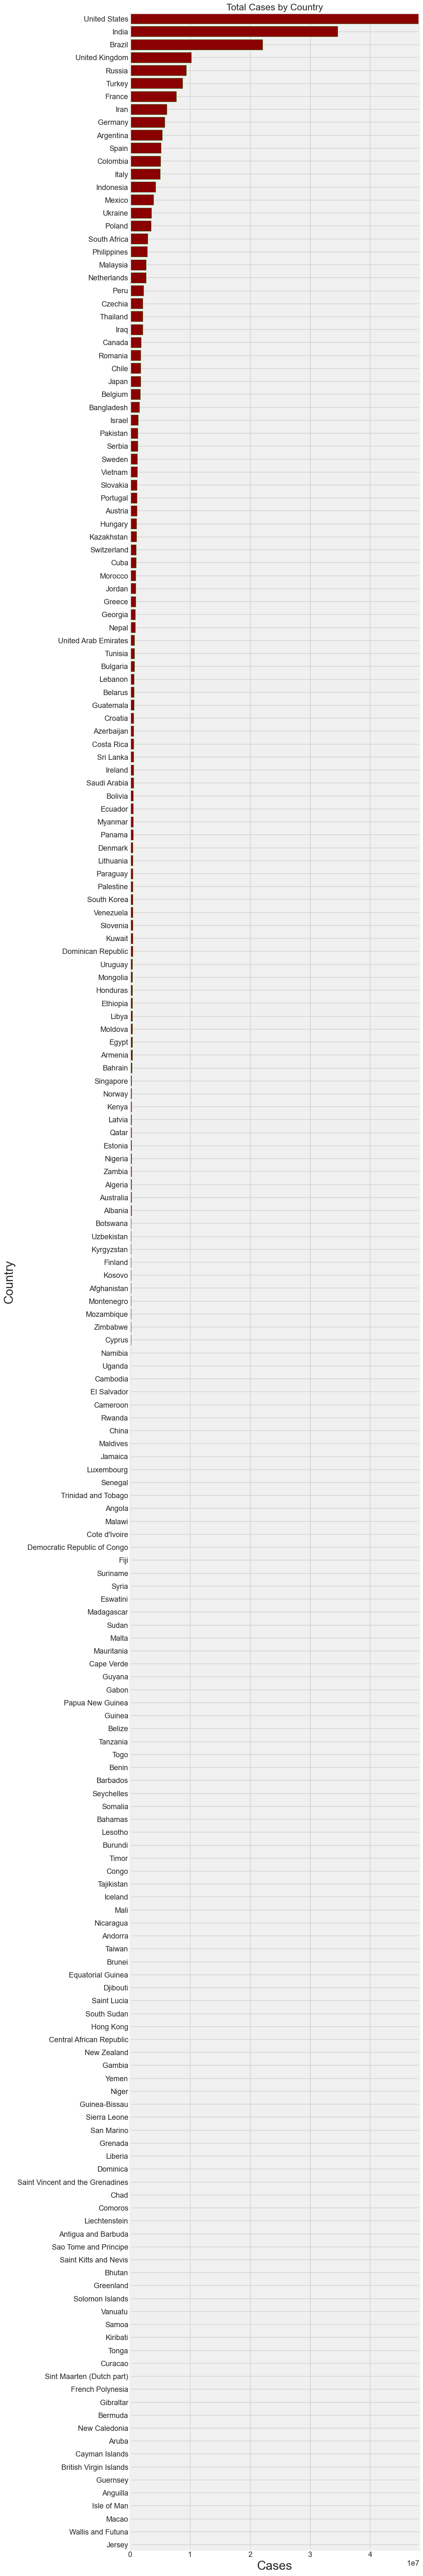

In [36]:
# bar plot cases by country

plt.figure(figsize=(10,90), dpi=90)

plt.tight_layout()
plt.style.use('fivethirtyeight')
plt.barh('country', 'total_cases',data=dfcv11_per_mil_asc,edgecolor="green", facecolor="darkred")
plt.xlabel("Cases", size=24)
plt.ylabel("Country", size=24)
plt.margins(x=0, y=0)
plt.title("Total Cases by Country", size=18)

plt.savefig("DC Output/DC Figures/Fig DC Total Cases by Country.png",bbox_inches='tight')

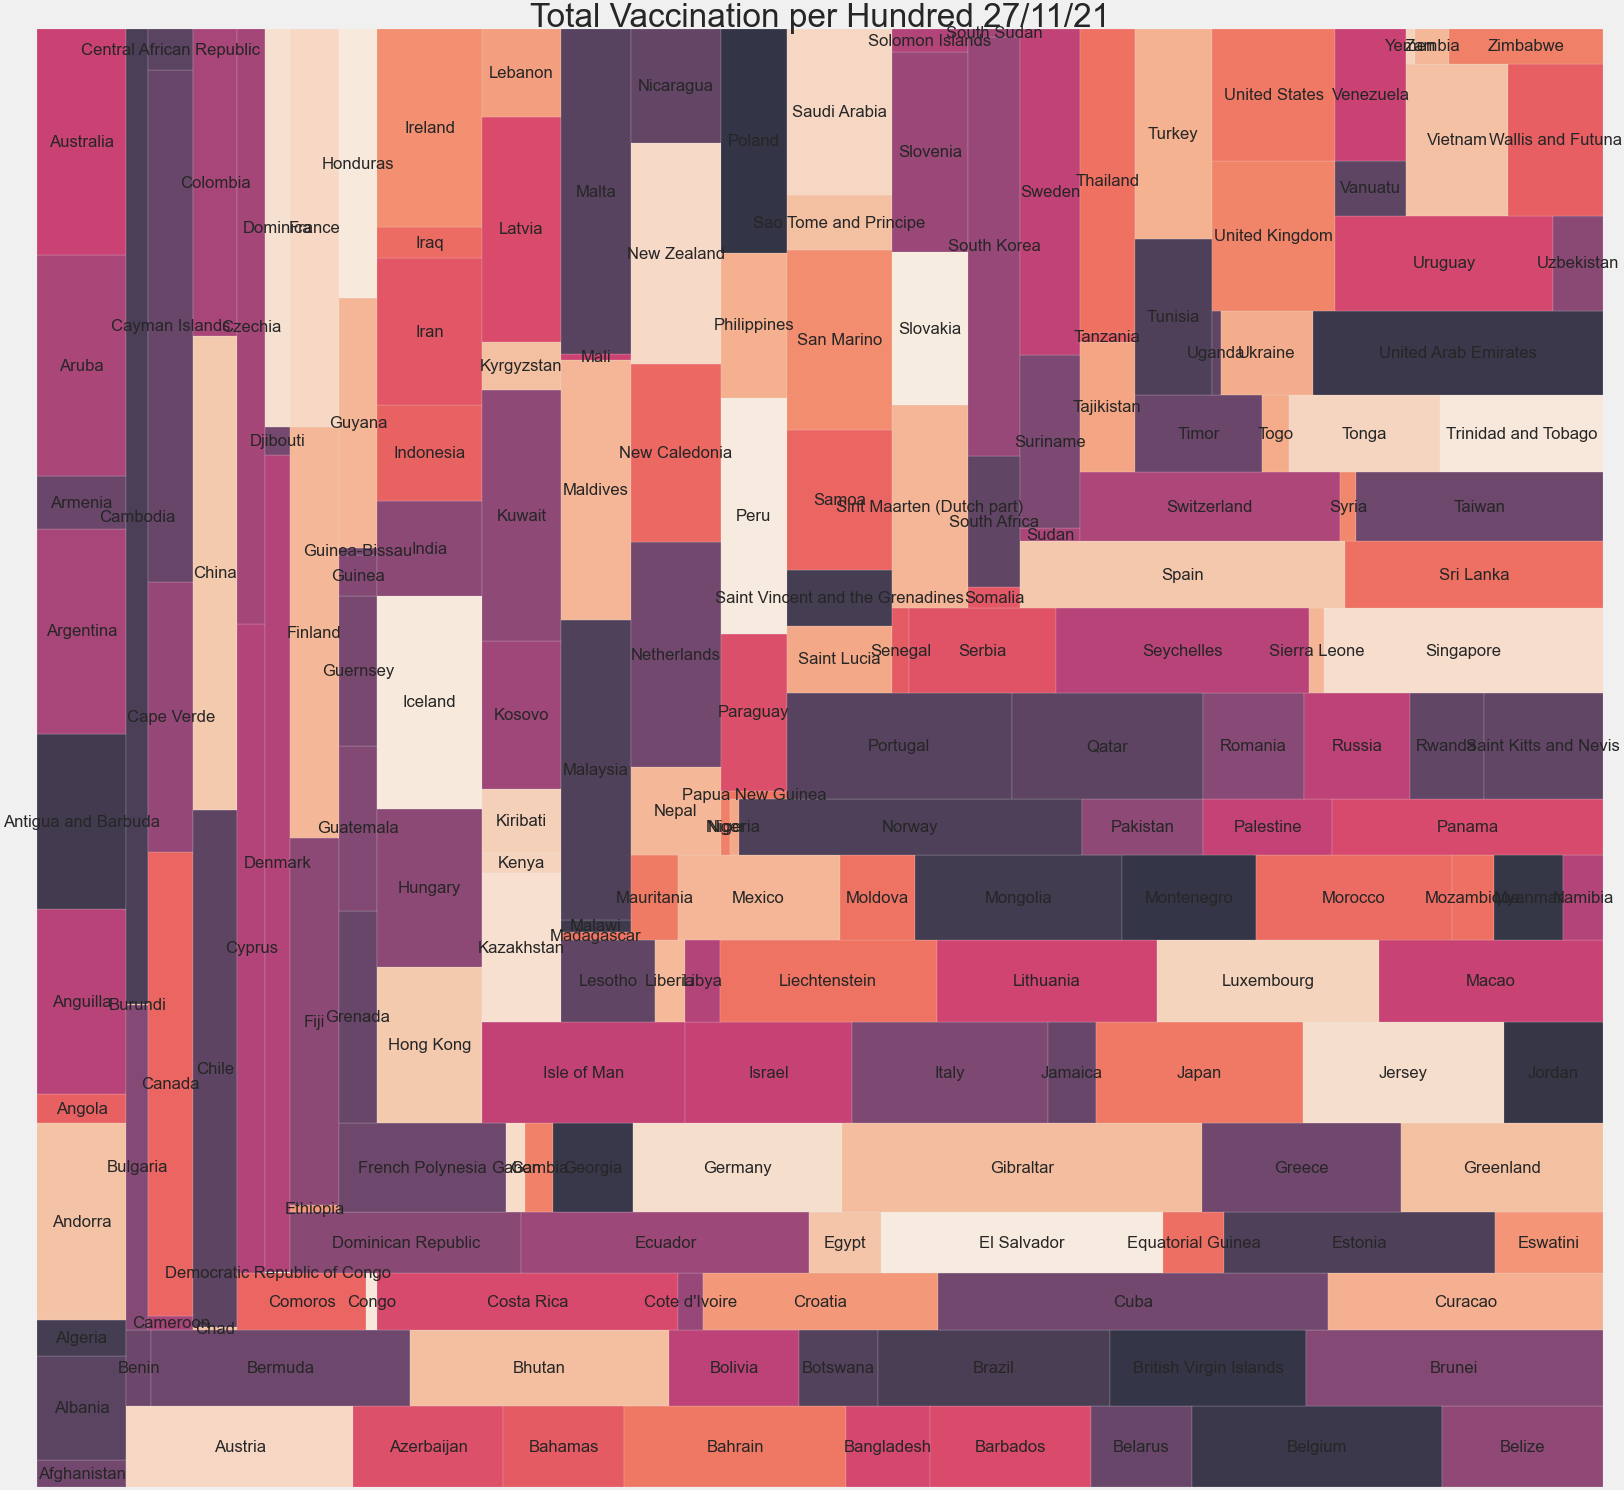

In [37]:
# use a treemap to vizualise the vaccination per hundred for all countries worlwide

plt.figure(figsize=(60, 60), dpi=30)
plt.title('Total Vaccination per Hundred 27/11/21', fontsize=80)

plt.rc('font', size=40) 

squarify.plot(sizes=cv_nov["vaccination_per_hundred"], label=cv_nov["location"], alpha=.8)

plt.axis('off')
plt.savefig("DC Output/DC Figures/Fig DC Total Vaccination per Hundred 271121", dpi='figure', bbox_inches="tight")
plt.show()


In [38]:
# countries with the highest number of cases
c10t = cv_nov.nlargest(10, ['total_cases'])
c10t

iso_code      continent        location       date   total_cases  \
59078      USA  North America   United States 2021-11-27 48,204,567.00   
25605      IND           Asia           India 2021-11-27 34,572,523.00   
8171       BRA  South America          Brazil 2021-11-27 22,076,863.00   
58714      GBR         Europe  United Kingdom 2021-11-27 10,165,779.00   
46061      RUS         Europe          Russia 2021-11-27  9,370,694.00   
56905      TUR           Asia          Turkey 2021-11-27  8,726,370.00   
19513      FRA         Europe          France 2021-11-27  7,691,217.00   
26240      IRN           Asia            Iran 2021-11-27  6,105,101.00   
20959      DEU         Europe         Germany 2021-11-27  5,780,814.00   
2436       ARG  South America       Argentina 2021-11-27  5,325,560.00   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
59078  24,738.00           71,690.86    777,025.00      208.00   
25605   8,774.00            8,872.86    468,554.00      621.00   
8171    9,233.00            9,244.71    614,186.00      229.00   
58714  39,834.00           44,017.29    145,167.00      131.00   
46061  33,119.00           33,649.29    266,337.00    1,203.00   
56905  23,759.00           24,860.43     76,233.00      192.00   
19513  37,089.00           27,615.00    119,850.00       32.00   
26240   3,045.00            4,571.86    129,549.00       87.00   
20959  44,977.00           58,052.57    100,887.00      104.00   
2436    1,521.00            1,551.14    116,517.00       12.00   

       new_deaths_smoothed  ...  population_mil  vaccination_rate  \
59078               749.71  ...          332.92              0.59   
25605               413.14  ...        1,393.41              0.31   
8171                228.43  ...          213.99              0.62   
58714               122.71  ...           68.21              0.68   
46061             1,206.57  ...          145.91              0.38   
56905               198.00  ...           85.04              0.59   
19513                63.29  ...           67.56              0.70   
26240                99.57  ...           85.03              0.54   
20959               260.00  ...           83.90              0.68   
2436                 20.43  ...           45.61              0.64   

          max_cases  max_vaccinated  cases_per_hundred  month  year  \
59078 49,884,847.00  200,145,430.00              14.98     11  2021   
25605 34,690,510.00  512,106,250.00               2.49     11  2021   
8171  22,177,059.00  139,389,518.00              10.36     11  2021   
58714 10,833,033.00   46,705,196.00              15.88     11  2021   
46061  9,812,538.00   60,962,126.00               6.72     11  2021   
56905  9,024,193.00   50,896,427.00              10.61     11  2021   
19513  8,318,995.00   47,838,675.00              12.31     11  2021   
26240  6,152,524.00   48,149,791.00               7.24     11  2021   
20959  6,528,894.00   57,811,831.00               7.78     11  2021   
2436   5,356,885.00   30,872,617.00              11.75     11  2021   

       vaccination_per_hundred  cases_per_vaccination  max_deaths  
59078                    60.12                   0.25  797,179.00  
25605                    36.75                   0.07  475,434.00  
8171                     65.14                   0.16  616,457.00  
58714                    68.48                   0.23  146,844.00  
46061                    41.78                   0.16  282,713.00  
56905                    59.85                   0.18   78,969.00  
19513                    70.80                   0.17  121,368.00  
26240                    56.63                   0.13  130,661.00  
20959                    68.91                   0.11  105,642.00  
2436                     67.69                   0.17  116,760.00  

[10 rows x 90 columns]

In [39]:
#10 countries with the highest number of cases per million
c10m = cv_nov.nlargest(10, ['total_cases_per_million'])
c10m[["country", "date", "total_cases_per_million", "total_cases", "population","cases_per_hundred","vaccination_per_hundred"]]


country       date  total_cases_per_million  total_cases  \
37327  Montenegro 2021-11-27               249,355.55   156,608.00   
49337  Seychelles 2021-11-27               234,526.34    23,197.00   
1219      Andorra 2021-11-27               216,045.71    16,712.00   
20613     Georgia 2021-11-27               209,887.85   835,306.00   
50456    Slovakia 2021-11-27               209,325.28 1,143,068.00   
50805    Slovenia 2021-11-27               200,073.80   415,898.00   
14756     Czechia 2021-11-27               196,770.35 2,110,274.00   
49011      Serbia 2021-11-27               181,723.13 1,248,719.00   
47778  San Marino 2021-11-27               174,360.48     5,930.00   
32991   Lithuania 2021-11-27               173,469.12   466,608.00   

         population  cases_per_hundred  vaccination_per_hundred  
37327    628,051.00              25.42                    41.94  
49337     98,910.00              24.07                    78.81  
1219      77,354.00              25.13                    65.07  
20613  3,979,773.00              22.27                    26.21  
50456  5,460,726.00              23.45                    43.32  
50805  2,078,723.00              21.13                    56.27  
14756 10,724,553.00              21.68                    60.39  
49011  6,871,547.00              18.53                    45.95  
47778     34,010.00              19.01                    69.83  
32991  2,689,862.00              18.20                    67.04

In [40]:
# countries with the highest number of cases per day
c10t = cv_nov.nlargest(10, ['new_cases_smoothed'])
c10t

iso_code      continent        location       date   total_cases  \
59078      USA  North America   United States 2021-11-27 48,204,567.00   
20959      DEU         Europe         Germany 2021-11-27  5,780,814.00   
58714      GBR         Europe  United Kingdom 2021-11-27 10,165,779.00   
46061      RUS         Europe          Russia 2021-11-27  9,370,694.00   
19513      FRA         Europe          France 2021-11-27  7,691,217.00   
56905      TUR           Asia          Turkey 2021-11-27  8,726,370.00   
44648      POL         Europe          Poland 2021-11-27  3,487,254.00   
39511      NLD         Europe     Netherlands 2021-11-27  2,618,592.00   
14756      CZE         Europe         Czechia 2021-11-27  2,110,274.00   
5822       BEL         Europe         Belgium 2021-11-27  1,701,633.00   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
59078  24,738.00           71,690.86    777,025.00      208.00   
20959  44,977.00           58,052.57    100,887.00      104.00   
58714  39,834.00           44,017.29    145,167.00      131.00   
46061  33,119.00           33,649.29    266,337.00    1,203.00   
19513  37,089.00           27,615.00    119,850.00       32.00   
56905  23,759.00           24,860.43     76,233.00      192.00   
44648  26,188.00           22,970.00     82,986.00      379.00   
39511  22,071.00           22,313.29     19,721.00       55.00   
14756  20,417.00           18,489.29     32,744.00      101.00   
5822        0.00           17,161.86     26,840.00        0.00   

       new_deaths_smoothed  ...  population_mil  vaccination_rate  \
59078               749.71  ...          332.92              0.59   
20959               260.00  ...           83.90              0.68   
58714               122.71  ...           68.21              0.68   
46061             1,206.57  ...          145.91              0.38   
19513                63.29  ...           67.56              0.70   
56905               198.00  ...           85.04              0.59   
44648               315.00  ...           37.80              0.54   
39511                45.86  ...           17.17              0.00   
14756               105.57  ...           10.72              0.59   
5822                 38.86  ...           11.63              0.75   

          max_cases  max_vaccinated  cases_per_hundred  month  year  \
59078 49,884,847.00  200,145,430.00              14.98     11  2021   
20959  6,528,894.00   57,811,831.00               7.78     11  2021   
58714 10,833,033.00   46,705,196.00              15.88     11  2021   
46061  9,812,538.00   60,962,126.00               6.72     11  2021   
19513  8,318,995.00   47,838,675.00              12.31     11  2021   
56905  9,024,193.00   50,896,427.00              10.61     11  2021   
44648  3,808,798.00   20,663,982.00              10.08     11  2021   
39511  2,905,742.00   12,772,175.00              16.92     11  2021   
14756  2,325,181.00    6,476,944.00              21.68     11  2021   
5822   1,929,772.00    8,731,781.00              16.59     11  2021   

       vaccination_per_hundred  cases_per_vaccination  max_deaths  
59078                    60.12                   0.25  797,179.00  
20959                    68.91                   0.11  105,642.00  
58714                    68.48                   0.23  146,844.00  
46061                    41.78                   0.16  282,713.00  
19513                    70.80                   0.17  121,368.00  
56905                    59.85                   0.18   78,969.00  
44648                    54.67                   0.18   88,414.00  
39511                    74.37                   0.23   20,530.00  
14756                    60.39                   0.36   34,377.00  
5822                     75.06                   0.22   27,504.00  

[10 rows x 90 columns]

In [41]:
# countries with the highest number of deaths per day
c10t = cv_nov.nlargest(10, ['new_deaths_smoothed'])
c10t

iso_code      continent       location       date   total_cases  \
46061      RUS         Europe         Russia 2021-11-27  9,370,694.00   
59078      USA  North America  United States 2021-11-27 48,204,567.00   
58040      UKR         Europe        Ukraine 2021-11-27  3,580,671.00   
25605      IND           Asia          India 2021-11-27 34,572,523.00   
44648      POL         Europe         Poland 2021-11-27  3,487,254.00   
20959      DEU         Europe        Germany 2021-11-27  5,780,814.00   
8171       BRA  South America         Brazil 2021-11-27 22,076,863.00   
36194      MEX  North America         Mexico 2021-11-27  3,879,836.00   
56905      TUR           Asia         Turkey 2021-11-27  8,726,370.00   
45699      ROU         Europe        Romania 2021-11-27  1,775,572.00   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
46061  33,119.00           33,649.29    266,337.00    1,203.00   
59078  24,738.00           71,690.86    777,025.00      208.00   
58040  15,027.00           14,189.14     89,911.00      604.00   
25605   8,774.00            8,872.86    468,554.00      621.00   
44648  26,188.00           22,970.00     82,986.00      379.00   
20959  44,977.00           58,052.57    100,887.00      104.00   
8171    9,233.00            9,244.71    614,186.00      229.00   
36194       0.00            3,000.71    293,614.00        0.00   
56905  23,759.00           24,860.43     76,233.00      192.00   
45699   1,727.00            2,115.29     56,169.00      180.00   

       new_deaths_smoothed  ...  population_mil  vaccination_rate  \
46061             1,206.57  ...          145.91              0.38   
59078               749.71  ...          332.92              0.59   
58040               580.57  ...           43.47              0.25   
25605               413.14  ...        1,393.41              0.31   
44648               315.00  ...           37.80              0.54   
20959               260.00  ...           83.90              0.68   
8171                228.43  ...          213.99              0.62   
36194               209.86  ...          130.26              0.50   
56905               198.00  ...           85.04              0.59   
45699               190.14  ...           19.13              0.39   

          max_cases  max_vaccinated  cases_per_hundred  month  year  \
46061  9,812,538.00   60,962,126.00               6.72     11  2021   
59078 49,884,847.00  200,145,430.00              14.98     11  2021   
58040  3,728,246.00   12,441,591.00               8.58     11  2021   
25605 34,690,510.00  512,106,250.00               2.49     11  2021   
44648  3,808,798.00   20,663,982.00              10.08     11  2021   
20959  6,528,894.00   57,811,831.00               7.78     11  2021   
8171  22,177,059.00  139,389,518.00              10.36     11  2021   
36194  3,914,706.00   66,003,384.00               3.01     11  2021   
56905  9,024,193.00   50,896,427.00              10.61     11  2021   
45699  1,791,502.00    7,593,882.00               9.37     11  2021   

       vaccination_per_hundred  cases_per_vaccination  max_deaths  
46061                    41.78                   0.16  282,713.00  
59078                    60.12                   0.25  797,179.00  
58040                    28.62                   0.30   96,427.00  
25605                    36.75                   0.07  475,434.00  
44648                    54.67                   0.18   88,414.00  
20959                    68.91                   0.11  105,642.00  
8171                     65.14                   0.16  616,457.00  
36194                    50.67                   0.06  296,385.00  
56905                    59.85                   0.18   78,969.00  
45699                    39.70                   0.24   57,531.00  

[10 rows x 90 columns]

In [42]:
# countries with the highest number of deaths 
c10t = cv_nov.nlargest(10, ['total_deaths'])
c10t

iso_code      continent        location       date   total_cases  \
59078      USA  North America   United States 2021-11-27 48,204,567.00   
8171       BRA  South America          Brazil 2021-11-27 22,076,863.00   
25605      IND           Asia           India 2021-11-27 34,572,523.00   
36194      MEX  North America          Mexico 2021-11-27  3,879,836.00   
46061      RUS         Europe          Russia 2021-11-27  9,370,694.00   
43957      PER  South America            Peru 2021-11-27  2,232,749.00   
58714      GBR         Europe  United Kingdom 2021-11-27 10,165,779.00   
25938      IDN           Asia       Indonesia 2021-11-27  4,255,672.00   
27891      ITA         Europe           Italy 2021-11-27  4,994,891.00   
26240      IRN           Asia            Iran 2021-11-27  6,105,101.00   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
59078  24,738.00           71,690.86    777,025.00      208.00   
8171    9,233.00            9,244.71    614,186.00      229.00   
25605   8,774.00            8,872.86    468,554.00      621.00   
36194       0.00            3,000.71    293,614.00        0.00   
46061  33,119.00           33,649.29    266,337.00    1,203.00   
43957   1,574.00            1,410.00    201,071.00       45.00   
58714  39,834.00           44,017.29    145,167.00      131.00   
25938     404.00              367.71    143,807.00       11.00   
27891  12,869.00           11,272.86    133,627.00       90.00   
26240   3,045.00            4,571.86    129,549.00       87.00   

       new_deaths_smoothed  ...  population_mil  vaccination_rate  \
59078               749.71  ...          332.92              0.59   
8171                228.43  ...          213.99              0.62   
25605               413.14  ...        1,393.41              0.31   
36194               209.86  ...          130.26              0.50   
46061             1,206.57  ...          145.91              0.38   
43957                34.00  ...           33.36              0.55   
58714               122.71  ...           68.21              0.68   
25938                11.29  ...          276.36              0.34   
27891                70.86  ...           60.37              0.73   
26240                99.57  ...           85.03              0.54   

          max_cases  max_vaccinated  cases_per_hundred  month  year  \
59078 49,884,847.00  200,145,430.00              14.98     11  2021   
8171  22,177,059.00  139,389,518.00              10.36     11  2021   
25605 34,690,510.00  512,106,250.00               2.49     11  2021   
36194  3,914,706.00   66,003,384.00               3.01     11  2021   
46061  9,812,538.00   60,962,126.00               6.72     11  2021   
43957  2,252,846.00   19,215,945.00               6.75     11  2021   
58714 10,833,033.00   46,705,196.00              15.88     11  2021   
25938  4,258,980.00  102,445,257.00               1.54     11  2021   
27891  5,206,305.00   44,281,676.00               8.62     11  2021   
26240  6,152,524.00   48,149,791.00               7.24     11  2021   

       vaccination_per_hundred  cases_per_vaccination  max_deaths  
59078                    60.12                   0.25  797,179.00  
8171                     65.14                   0.16  616,457.00  
25605                    36.75                   0.07  475,434.00  
36194                    50.67                   0.06  296,385.00  
46061                    41.78                   0.16  282,713.00  
43957                    57.60                   0.12  201,733.00  
58714                    68.48                   0.23  146,844.00  
25938                    37.07                   0.04  143,929.00  
27891                    73.35                   0.12  134,765.00  
26240                    56.63                   0.13  130,661.00  

[10 rows x 90 columns]

In [43]:
#10 countries with the highest number of cases per million
c10pfv = cv_nov.nlargest(10, ['people_fully_vaccinated_y'])
c10pfv[["country", "date", "total_cases_per_million", "total_cases", "people_fully_vaccinated_y","population"]]

country       date  total_cases_per_million   total_cases  \
25605          India 2021-11-27                24,811.47 34,572,523.00   
59078  United States 2021-11-27               144,795.39 48,204,567.00   
8171          Brazil 2021-11-27               103,166.07 22,076,863.00   
25938      Indonesia 2021-11-27                15,398.92  4,255,672.00   
36194         Mexico 2021-11-27                29,784.81  3,879,836.00   
20959        Germany 2021-11-27                68,900.85  5,780,814.00   
46061         Russia 2021-11-27                64,221.54  9,370,694.00   
56905         Turkey 2021-11-27               102,611.59  8,726,370.00   
60376        Vietnam 2021-11-27                12,197.40  1,197,404.00   
19513         France 2021-11-27               113,835.60  7,691,217.00   

       people_fully_vaccinated_y       population  
25605             431,417,303.00 1,393,409,033.00  
59078             196,432,768.00   332,915,074.00  
8171              132,667,094.00   213,993,441.00  
25938              94,339,737.00   276,361,788.00  
36194              64,830,452.00   130,262,220.00  
20959              57,005,565.00    83,900,471.00  
46061              55,964,877.00   145,912,022.00  
56905              50,329,638.00    85,042,736.00  
60376              49,021,083.00    98,168,829.00  
19513              47,005,104.00    67,564,251.00

In [44]:
#10 countries with the largest number of fully vaccinated people
v10 = cv_nov.nlargest(10, ['max_vaccinated'])
v10

iso_code      continent       location       date   total_cases  \
11764      CHN           Asia          China 2021-11-27     98,708.00   
25605      IND           Asia          India 2021-11-27 34,572,523.00   
59078      USA  North America  United States 2021-11-27 48,204,567.00   
8171       BRA  South America         Brazil 2021-11-27 22,076,863.00   
25938      IDN           Asia      Indonesia 2021-11-27  4,255,672.00   
28466      JPN           Asia          Japan 2021-11-27  1,726,419.00   
36194      MEX  North America         Mexico 2021-11-27  3,879,836.00   
46061      RUS         Europe         Russia 2021-11-27  9,370,694.00   
20959      DEU         Europe        Germany 2021-11-27  5,780,814.00   
60376      VNM           Asia        Vietnam 2021-11-27  1,197,404.00   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
11764      23.00               23.43      4,636.00        0.00   
25605   8,774.00            8,872.86    468,554.00      621.00   
59078  24,738.00           71,690.86    777,025.00      208.00   
8171    9,233.00            9,244.71    614,186.00      229.00   
25938     404.00              367.71    143,807.00       11.00   
28466     120.00              100.57     18,354.00        1.00   
36194       0.00            3,000.71    293,614.00        0.00   
46061  33,119.00           33,649.29    266,337.00    1,203.00   
20959  44,977.00           58,052.57    100,887.00      104.00   
60376  16,067.00           16,111.29     24,692.00      148.00   

       new_deaths_smoothed  ...  population_mil  vaccination_rate  \
11764                 0.00  ...        1,444.22              0.00   
25605               413.14  ...        1,393.41              0.31   
59078               749.71  ...          332.92              0.59   
8171                228.43  ...          213.99              0.62   
25938                11.29  ...          276.36              0.34   
28466                 1.57  ...          126.05              0.00   
36194               209.86  ...          130.26              0.50   
46061             1,206.57  ...          145.91              0.38   
20959               260.00  ...           83.90              0.68   
60376               143.86  ...           98.17              0.50   

          max_cases   max_vaccinated  cases_per_hundred  month  year  \
11764     99,756.00 1,125,000,000.00               0.01     11  2021   
25605 34,690,510.00   512,106,250.00               2.49     11  2021   
59078 49,884,847.00   200,145,430.00              14.98     11  2021   
8171  22,177,059.00   139,389,518.00              10.36     11  2021   
25938  4,258,980.00   102,445,257.00               1.54     11  2021   
28466  1,727,925.00    97,941,682.00               1.37     11  2021   
36194  3,914,706.00    66,003,384.00               3.01     11  2021   
46061  9,812,538.00    60,962,126.00               6.72     11  2021   
20959  6,528,894.00    57,811,831.00               7.78     11  2021   
60376  1,398,413.00    56,385,197.00               1.42     11  2021   

       vaccination_per_hundred  cases_per_vaccination  max_deaths  
11764                    77.90                   0.00    4,639.00  
25605                    36.75                   0.07  475,434.00  
59078                    60.12                   0.25  797,179.00  
8171                     65.14                   0.16  616,457.00  
25938                    37.07                   0.04  143,929.00  
28466                    77.70                   0.02   18,369.00  
36194                    50.67                   0.06  296,385.00  
46061                    41.78                   0.16  282,713.00  
20959                    68.91                   0.11  105,642.00  
60376                    57.44                   0.02   27,611.00  

[10 rows x 90 columns]

In [45]:
#10 countries with the highest number of vaccinations per hundred
c10pfv = cv_nov.nlargest(10, ['vaccination_per_hundred'])
c10pfv[["country", "date", "total_cases_per_million", "total_cases", "people_fully_vaccinated_y","cases_per_hundred","vaccination_per_hundred"]]

country       date  total_cases_per_million  total_cases  \
21553             Gibraltar 2021-11-27                     0.00         0.00   
58379  United Arab Emirates 2021-11-27                74,252.01   741,858.00   
44996              Portugal 2021-11-27               112,098.61 1,139,810.00   
49933             Singapore 2021-11-27                47,974.92   261,636.00   
11403                 Chile 2021-11-27                91,455.54 1,757,077.00   
10666        Cayman Islands 2021-11-27                     0.00         0.00   
35281                 Malta 2021-11-27                75,880.64    39,162.00   
8583                 Brunei 2021-11-27                33,954.50    14,992.00   
13843                  Cuba 2021-11-27                85,007.04   962,067.00   
25273               Iceland 2021-11-27                50,809.65    17,446.00   

       people_fully_vaccinated_y  cases_per_hundred  vaccination_per_hundred  
21553                  39,818.00               0.00                   118.34  
58379               8,926,047.00               7.43                    90.18  
44996                       0.00              11.71                    88.69  
49933                       0.00               5.01                    87.00  
11403              16,104,110.00               9.27                    84.88  
10666                       0.00               0.00                    84.49  
35281                 432,097.00               7.84                    84.04  
8583                  342,216.00               3.47                    83.18  
13843               9,194,017.00               8.51                    82.56  
25273                       0.00               5.58                    82.19

In [46]:
# sort by total cases
c10t_desc= c10t.sort_values('total_cases',ascending=False)

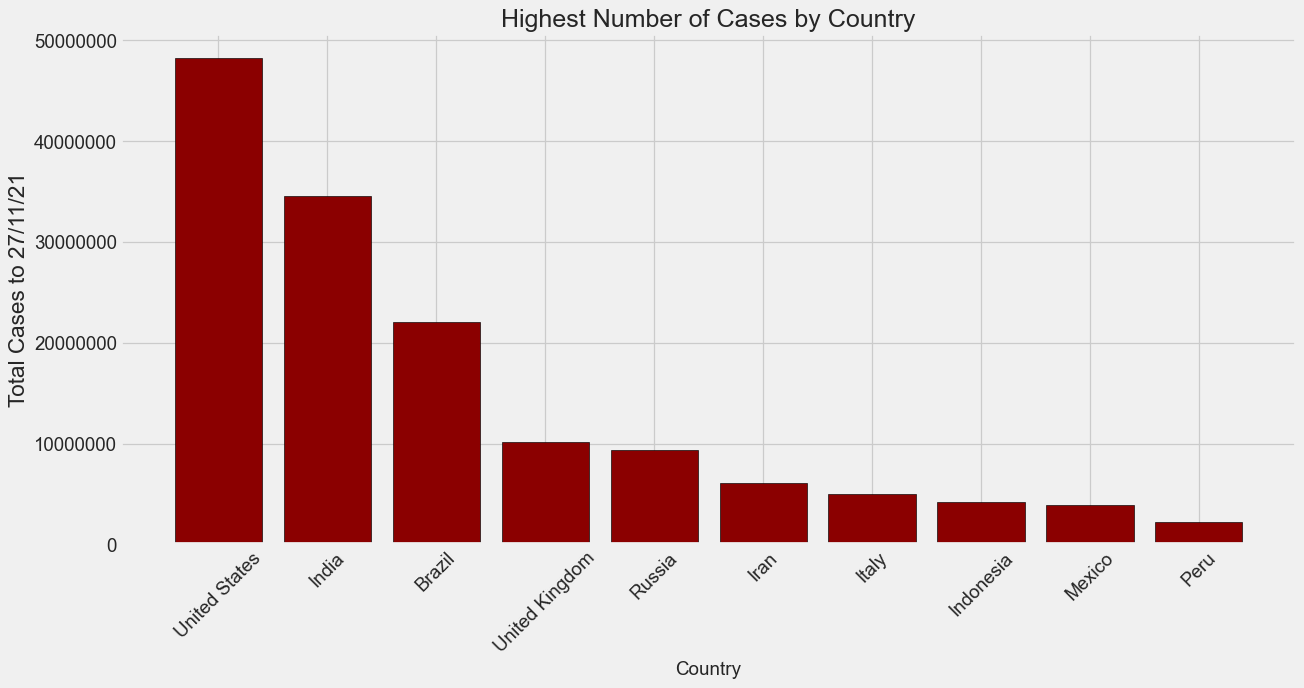

In [47]:
# plot 10 countries with the highest number of cases 

plt.figure(figsize=(15, 7), dpi=90)
plt.bar(c10t_desc["country"],c10t_desc["total_cases"],edgecolor="black", facecolor="darkred")
plt.xlabel("Country",fontsize=15)
plt.ylabel("Total Cases to 27/11/21", fontsize=18)
plt.title("Highest Number of Cases by Country", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 15)
plt.grid(True)
plt.savefig("DC Output/DC Figures/Fig DC Highest Number of Cases by Country.png", bbox_inches="tight")
plt.show()

In [48]:
# total cases for countries with the highest number of cases worldwide

fig = px.bar(c10t_desc, 
             y = 'total_cases',
             x = "location",
             color = 'total_cases',
             color_discrete_sequence= px.colors.sequential.Electric
            )
fig.update_layout(
    title={
            'text' : "Countries With the Highest Number of Cases",
            'y':0.96,
            'x':0.45
        },
    xaxis_title="Country",
    yaxis_title="Cases per Hundred",
    legend_title="Countries With the Highest Number of Cases"
)
#fig.savefig("DC Output/DC Figures/FigDCCountries With the Highest Number of Cases.png")
fig.show()

In [49]:
#10 countries with the largest number of cases recorded to 11/12/21
c10 = cv_nov.nlargest(10, ['max_cases'])
c10[["country", "max_cases"]]



country     max_cases
59078   United States 49,884,847.00
25605           India 34,690,510.00
8171           Brazil 22,177,059.00
58714  United Kingdom 10,833,033.00
46061          Russia  9,812,538.00
56905          Turkey  9,024,193.00
19513          France  8,318,995.00
20959         Germany  6,528,894.00
26240            Iran  6,152,524.00
2436        Argentina  5,356,885.00

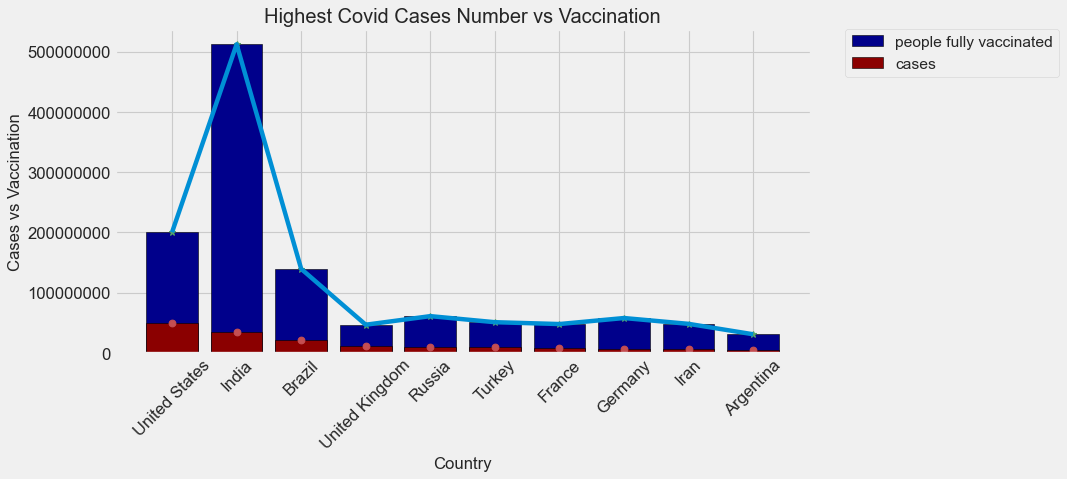

In [50]:
# plot the maximum cases by country and save the figure in a png file

plt.figure(figsize=(10, 5), dpi=80)

plt.bar(c10["country"],c10["max_vaccinated"], edgecolor="black",color="darkblue", label="people fully vaccinated")
plt.bar(c10["country"],c10["max_cases"],edgecolor="black", facecolor="darkred", label="cases")
plt.plot(c10["country"],c10["max_vaccinated"],'g*')
plt.plot(c10["country"],c10["max_cases"],'ro')
plt.plot(c10["country"],c10["max_vaccinated"])

#plt.plot(c10["country"],c10["gdp_per_capita"],'ks')
plt.xlabel("Country",fontsize=15)
plt.ylabel("Cases vs Vaccination", fontsize=15)
plt.title("Highest Covid Cases Number vs Vaccination", fontsize=18)
plt.xticks(rotation=45, fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 15)
plt.grid(True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='14', title = "",  title_fontsize = "22")

plt.savefig("DC Output/DC Figures/Fig DC Max Cases vs Vaccination.png", bbox_inches="tight")

plt.show()


In [51]:
#10 countries with the largest number of people vaccinated
v10t = cv_nov.nlargest(10, ['people_vaccinated_y'])
v10t[["date","country", "people_vaccinated_y", "people_fully_vaccinated_y", "vaccination_per_hundred", "total_cases"]]

date        country  people_vaccinated_y  \
25605 2021-11-27          India       781,075,743.00   
59078 2021-11-27  United States       234,572,745.00   
8171  2021-11-27         Brazil       163,607,249.00   
25938 2021-11-27      Indonesia       138,530,231.00   
36194 2021-11-27         Mexico        76,480,431.00   
60376 2021-11-27        Vietnam        69,747,303.00   
46061 2021-11-27         Russia        66,011,769.00   
20959 2021-11-27        Germany        59,316,604.00   
4837  2021-11-27     Bangladesh        57,817,590.00   
26240 2021-11-27           Iran        57,332,853.00   

       people_fully_vaccinated_y  vaccination_per_hundred   total_cases  
25605             431,417,303.00                    36.75 34,572,523.00  
59078             196,432,768.00                    60.12 48,204,567.00  
8171              132,667,094.00                    65.14 22,076,863.00  
25938              94,339,737.00                    37.07  4,255,672.00  
36194              64,830,452.00                    50.67  3,879,836.00  
60376              49,021,083.00                    57.44  1,197,404.00  
46061              55,964,877.00                    41.78  9,370,694.00  
20959              57,005,565.00                    68.91  5,780,814.00  
4837               35,969,066.00                    25.29  1,575,579.00  
26240              46,328,337.00                    56.63  6,105,101.00

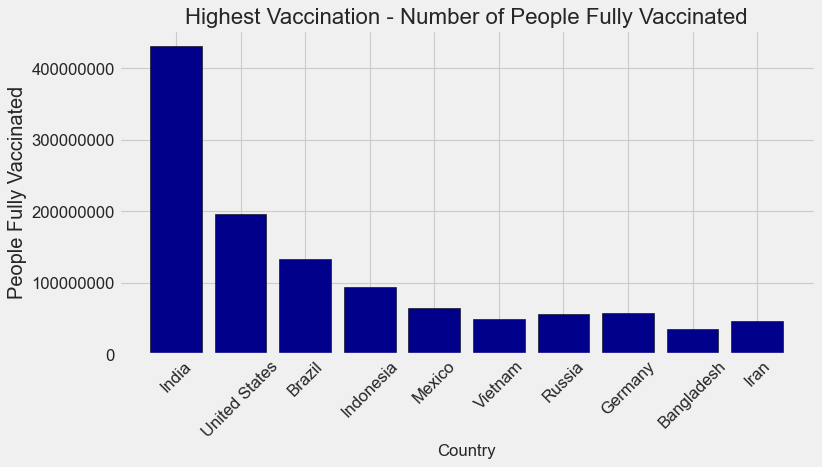

In [52]:
# plot the highest vaccination by country and save the figure in a png file

plt.figure(figsize=(10, 5), dpi=80)
plt.bar(v10t["country"],v10t["people_fully_vaccinated_y"],edgecolor="black", facecolor="darkblue")
plt.xlabel("Country",fontsize=15)
plt.ylabel("People Fully Vaccinated", fontsize=18)
plt.title("Highest Vaccination - Number of People Fully Vaccinated", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 15)
plt.grid(True)
plt.savefig("DC Output/DC Figures/Fig DC Highest Vaccination.png", bbox_inches="tight")
plt.show()

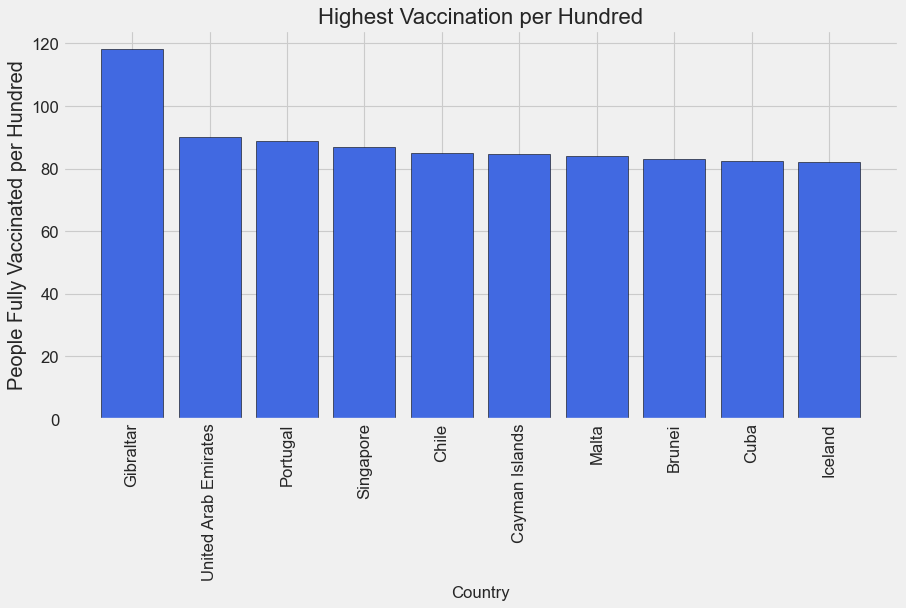

In [53]:
# plot the highest vaccination per hundrdd by country and save the figure in a png file

v10perhundred = cv_nov.nlargest(10, ['vaccination_per_hundred'])

plt.figure(figsize=(12, 6), dpi=80)
plt.bar(v10perhundred["country"],v10perhundred["vaccination_per_hundred"],edgecolor="black", facecolor="royalblue")
plt.xlabel("Country",fontsize=15)
plt.ylabel("People Fully Vaccinated per Hundred", fontsize=18)
plt.title("Highest Vaccination per Hundred", fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 15)
plt.grid(True)
plt.savefig("DC Output/DC Figures/Fig DC Highest Vaccination per Hundred.png", bbox_inches="tight")
plt.show()

In [54]:
# select 6 countries with high number of cases
countries_sample=["United States","India","Brazil","United Kingdom","Russia","Turkey"]

In [55]:
# select countries with high number of cases

US_df=cases_vaccination.loc[cases_vaccination["location"]=='United States']
US_new_cases=US_df["new_cases"]

India_df=cases_vaccination.loc[cases_vaccination["location"]=='India']
India_new_cases=India_df["new_cases"]

Brazil_df=cases_vaccination.loc[cases_vaccination["location"]=='Brazil']
Brazil_new_cases=Brazil_df["new_cases"]

UK_df=cases_vaccination.loc[cases_vaccination["location"]=='United Kingdom']
UK_new_cases=UK_df["new_cases"]

Russia_df=cases_vaccination.loc[cases_vaccination["location"]=='Russia']
Russia_new_cases=Russia_df["new_cases"]

Turkey_df=cases_vaccination.loc[cases_vaccination["location"]=='Turkey']
Turkey_new_cases=Turkey_df["new_cases"]


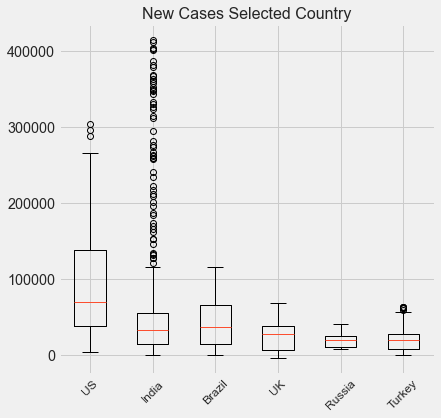

In [56]:
# Generate a box plot of for new cases for selected countries

data_to_plot = [US_new_cases,
                India_new_cases,
                Brazil_new_cases,
                UK_new_cases,
                Russia_new_cases,
                Turkey_new_cases,
                ]



fig1, ax1 = plt.subplots()

ax1.set_title('New Cases Selected Country', fontsize=16)

ax1.boxplot(data_to_plot)


plt.xticks([1, 2, 3, 4, 5, 6], ['US', 'India', 'Brazil', 'UK', "Russia", "Turkey"], rotation=45, fontsize=12)


plt.savefig("DC Output/DC Figures/Fig DC Box Plot New Cases Selected Countries.png", bbox_inches="tight")

plt.show()

In [57]:
# calculate the quartiles for United States and identify potential outliers
us_df=cases_vaccination.loc[cases_vaccination["location"]=='United States']
us_new_cases=us_df["new_cases"]

quartiles = us_new_cases.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of new cases for United States is: {lowerq}")
print(f"The upper quartile of new cases for United States is: {upperq}")
print(f"The interquartile range of new cases for United States is: {iqr}")
print(f"The the median of of new cases for United States is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of new cases for United States is: 38376.0
The upper quartile of new cases for United States is: 138466.75
The interquartile range of new cases for United States is: 100090.75
The the median of of new cases for United States is: 69251.0 
Values below -111760.125 could be outliers.
Values above 288602.875 could be outliers.


In [58]:
c6 = cases_vaccination.loc[(        (cases_vaccination['country'] == "United States")|
                                      (cases_vaccination['country'] == "India") |
                                      (cases_vaccination['country'] == "Brazil")|
                                      (cases_vaccination['country'] == "United Kingdom")| 
                                      (cases_vaccination['country'] == "Russia")|
                                      (cases_vaccination['country'] == "Turkey")
                                      )& 
                                      ((cases_vaccination['year'] != "2020")& 
                                       (cases_vaccination['month'] != "12")&
                                      (cases_vaccination['new_cases'] >= 0))]

In [59]:
c6

iso_code      continent       location       date   total_cases  \
7856       BRA  South America         Brazil 2021-02-01  7,716,405.00   
7857       BRA  South America         Brazil 2021-03-01  7,733,746.00   
7858       BRA  South America         Brazil 2021-04-01  7,753,752.00   
7859       BRA  South America         Brazil 2021-05-01  7,810,400.00   
7860       BRA  South America         Brazil 2021-06-01  7,873,830.00   
...        ...            ...            ...        ...           ...   
59088      USA  North America  United States 2021-07-12 49,394,125.00   
59089      USA  North America  United States 2021-08-12 49,543,526.00   
59090      USA  North America  United States 2021-09-12 49,661,477.00   
59091      USA  North America  United States 2021-10-12 49,833,771.00   
59092      USA  North America  United States 2021-11-12 49,884,847.00   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
7856   15,827.00           35,799.86    195,725.00      314.00   
7857   17,341.00           35,637.29    196,018.00      293.00   
7858   20,006.00           35,559.86    196,561.00      543.00   
7859   56,648.00           35,264.14    197,732.00    1,171.00   
7860   63,430.00           36,375.71    198,974.00    1,242.00   
...          ...                 ...           ...         ...   
59088 111,850.00          119,088.00    791,516.00    1,609.00   
59089 149,401.00          120,636.00    793,230.00    1,714.00   
59090 117,951.00          117,709.86    794,649.00    1,419.00   
59091 172,294.00          120,375.57    796,764.00    2,115.00   
59092  51,076.00          118,926.00    797,179.00      415.00   

       new_deaths_smoothed  ...  population_mil  vaccination_rate  \
7856                704.29  ...          213.99              0.00   
7857                697.00  ...          213.99              0.01   
7858                713.00  ...          213.99              0.02   
7859                721.57  ...          213.99              0.07   
7860                728.43  ...          213.99              0.11   
...                    ...  ...             ...               ...   
59088             1,565.00  ...          332.92              0.49   
59089             1,529.71  ...          332.92              0.51   
59090             1,189.43  ...          332.92              0.54   
59091             1,272.71  ...          332.92              0.57   
59092             1,259.29  ...          332.92              0.58   

          max_cases  max_vaccinated  cases_per_hundred  month  year  \
7856  22,177,059.00  139,389,518.00              10.36      2  2021   
7857  22,177,059.00  139,389,518.00              10.36      3  2021   
7858  22,177,059.00  139,389,518.00              10.36      4  2021   
7859  22,177,059.00  139,389,518.00              10.36      5  2021   
7860  22,177,059.00  139,389,518.00              10.36      6  2021   
...             ...             ...                ...    ...   ...   
59088 49,884,847.00  200,145,430.00              14.98      7  2021   
59089 49,884,847.00  200,145,430.00              14.98      8  2021   
59090 49,884,847.00  200,145,430.00              14.98      9  2021   
59091 49,884,847.00  200,145,430.00              14.98     10  2021   
59092 49,884,847.00  200,145,430.00              14.98     11  2021   

       vaccination_per_hundred  cases_per_vaccination  max_deaths  
7856                     65.14                   0.16  616,457.00  
7857                     65.14                   0.16  616,457.00  
7858                     65.14                   0.16  616,457.00  
7859                     65.14                   0.16  616,457.00  
7860                     65.14                   0.16  616,457.00  
...                        ...                    ...         ...  
59088                    60.12                   0.25  797,179.00  
59089                    60.12                   0.25  797,179.00  
59090                    60.12            

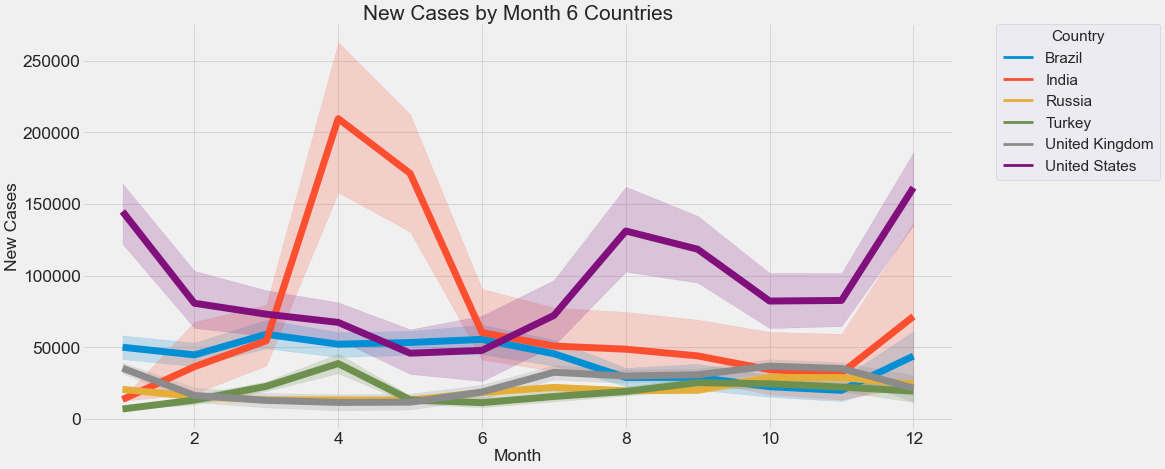

In [60]:
# new cases by month for selected countries
plt.figure(figsize=(20, 10), dpi=50)

sns.lineplot(x=c6['month'], y=c6['new_cases'], hue=c6['country'], linewidth=10)
sns.set(style="darkgrid")
plt.xlabel('Month', fontsize=25)
plt.ylabel('New Cases', fontsize=25)
plt.title("New Cases by Month 6 Countries", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='22', title = "Country",  title_fontsize = "22")
plt.xticks(rotation=0, fontsize=25)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 25)

plt.savefig("DC Output/DC Figures/Fig DC New Cases by Date Selected Countries", dpi='figure', bbox_inches="tight")

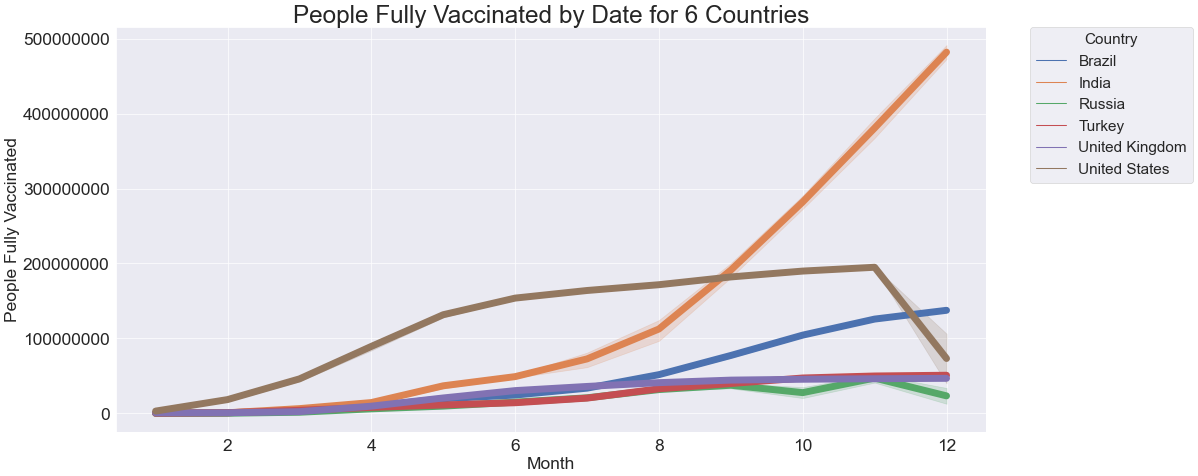

In [61]:
plt.figure(figsize=(20, 10), dpi=50)

sns.lineplot(x=c6['month'], y=c6['people_fully_vaccinated_y'], hue=c6['country'], linewidth=10)
sns.set(style="darkgrid")
plt.xlabel('Month', fontsize=25)
plt.ylabel('People Fully Vaccinated', fontsize=25)
plt.title("People Fully Vaccinated by Date for 6 Countries", fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='22', title = "Country",  title_fontsize = "22")
plt.xticks(rotation=0, fontsize=25)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 25)

plt.savefig("DC Output/DC Figures/Fig DC People Fully Vaccinated by Month 6 Countries", dpi='figure', bbox_inches="tight")
    
plt.show()

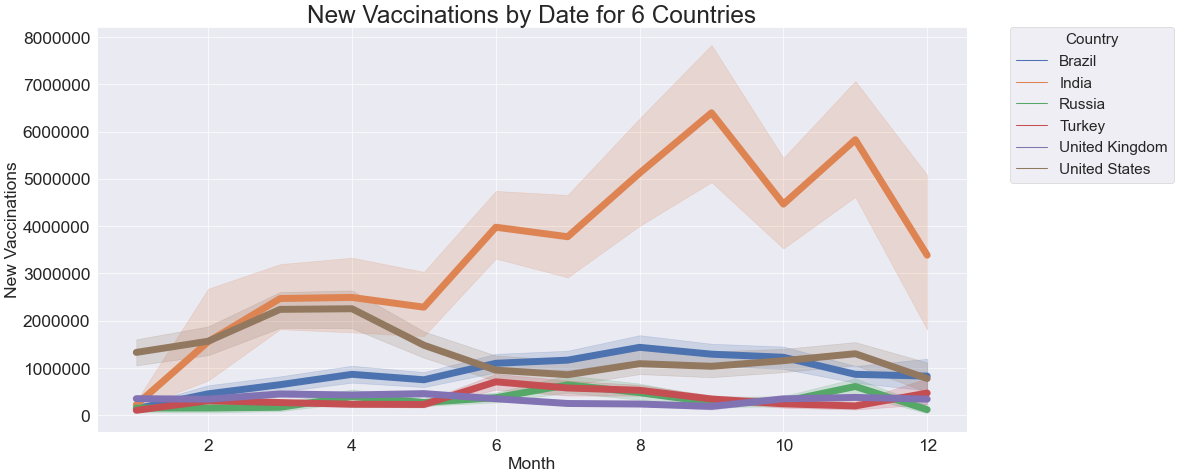

In [62]:
plt.figure(figsize=(20, 10), dpi=50)

sns.lineplot(x=c6['month'], y=c6['new_vaccinations'], hue=c6['country'], linewidth=10)
sns.set(style="darkgrid")
plt.xlabel('Month', fontsize=25)
plt.ylabel('New Vaccinations', fontsize=25)
plt.title("New Vaccinations by Date for 6 Countries", fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='22', title = "Country",  title_fontsize = "22")
plt.xticks(rotation=0, fontsize=25)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 25)



plt.savefig("DC Output/DC Figures/Fig DC New Vaccinations by Month for 6 Countries", dpi='figure', bbox_inches="tight")
    
plt.show()

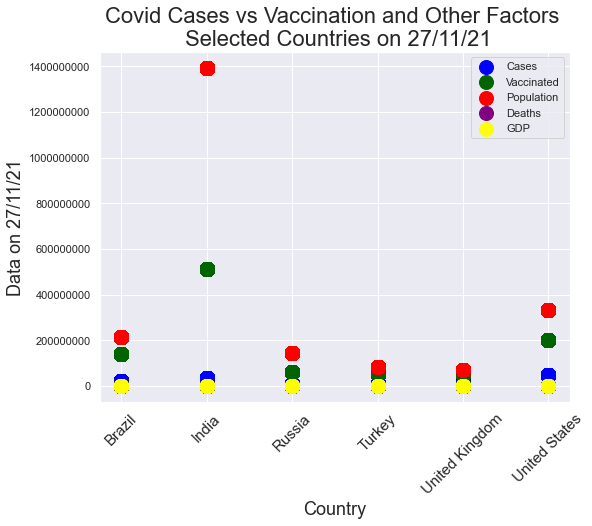

In [63]:
# scatter plot selected countries 
c6.groupby("location")

ax = c6.plot(kind='scatter', x='location', y='max_cases',color='blue', label='Cases', s=14**2,figsize=(7.5,6));
c6.plot(kind='scatter', x='location', y='max_vaccinated',color='darkgreen', label='Vaccinated', ax=ax, s=14**2);
c6.plot(kind='scatter', x='location', y='population',color='red', label='Population', ax=ax, s=14**2);
c6.plot(kind='scatter', x='location', y='max_deaths',color='purple', label='Deaths', ax=ax,s=14**2);
c6.plot(kind='scatter', x='location', y='gdp_per_capita',color='yellow', label='GDP', ax=ax, s=14**2, alpha=0.95);
plt.title("Covid Cases vs Vaccination and Other Factors \n Selected Countries on 27/11/21", fontsize=22)
plt.ylabel("Data on 27/11/21", fontsize=18)
plt.xlabel("Country", fontsize=18)
plt.xticks(rotation=45, fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig("DC Output/DC Figures/Fig DC Covid Cases vs Vaccination and Other Factors.png", bbox_inches="tight")
plt.show()

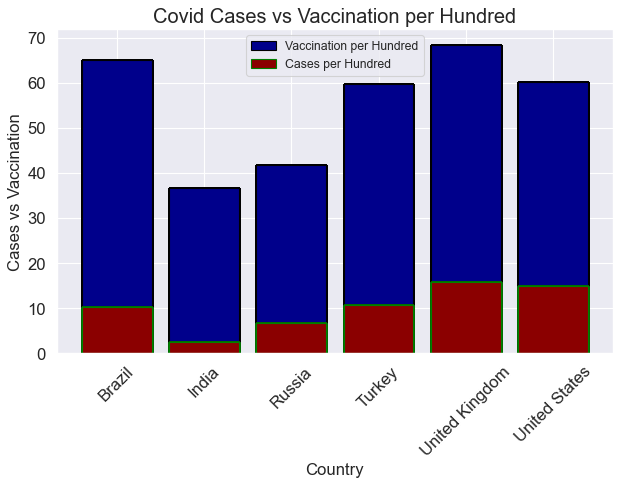

In [64]:
# plot the maximum cases by country and save the figure in a png file - selected countries

plt.figure(figsize=(8, 5), dpi=80)
plt.bar(c6["location"],c6["vaccination_per_hundred"], edgecolor="black",color="darkblue", label="Vaccination per Hundred")
plt.bar(c6["location"],c6["cases_per_hundred"],edgecolor="green", facecolor="darkred", label="Cases per Hundred")


plt.xlabel("Country",fontsize=15)
plt.ylabel("Cases vs Vaccination", fontsize=15)
plt.title("Covid Cases vs Vaccination per Hundred", fontsize=18)
plt.xticks(rotation=45, fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 15)
plt.grid(True)
plt.legend()
plt.savefig("DC Output/DC Figures/Fig DC Cases vs Vaccination per Hundred.png", bbox_inches="tight")
plt.show()

In [65]:
# plot India new cases, new deaths and people fully vaccinated
px.scatter(India_df, x='date', y='new_cases', size="vaccination_rate", color='new_deaths',title="India Monthly New Cases, Deaths and Vaccination")

#plt.savefig("DC Output/DC Figures/Fig DC India Monthly New Cases, Deaths and Vaccination", dpi='figure', bbox_inches="tight")

In [66]:
# plot new cases vs people fully vaccinated for India
px.scatter(India_df, x='date', y='new_cases_smoothed',size="new_cases_smoothed",color='total_vaccinations_per_hundred_y',title="India Monthly New Cases vs Total Vaccinationa per Hundred")

#plt.savefig("DC Output/DC Figures/Fig DC India Monthly New Cases vs Total Vaccinationa per Hundred.png", bbox_inches="tight")

In [67]:
# plot new cases vs new vaccinations smoothed India
px.scatter(India_df, x='date', y='new_cases',size="new_cases",color='new_vaccinations_smoothed',title="India Monthly New Cases vs New Vaccinations")

#plt.savefig("DC Output/DC Figures/Fig DC India Monthly New Cases vs New Vaccinations.png", bbox_inches="tight")

The r-squared is: 0.04201288971938073


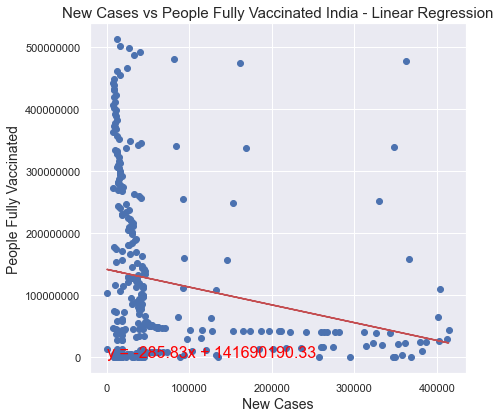

In [68]:
# India cases vs vaccination
plt.rcParams['figure.figsize'] = [6, 6]
x_values = India_df["new_cases"]
y_values = India_df["people_fully_vaccinated_y"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('New Cases', fontsize=14)
plt.ylabel('People Fully Vaccinated', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.title('New Cases vs People Fully Vaccinated India - Linear Regression', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Cases vs People Fully Vaccinated India - Linear Regression 1", dpi='figure', bbox_inches="tight")
plt.show()

In [69]:
# plot US new cases, new deaths and people fully vaccinated
px.scatter(US_df, x='date', y='new_cases', size="vaccination_rate", color='new_deaths',title="US Monthly New Cases, Deaths and Vaccination")

#plt.savefig("DC Output/DC Figures/Fig DC US Monthly New Cases, Deaths and Vaccination.png", dpi='figure', bbox_inches="tight")

In [70]:
# plot new cases vs people fully vaccinated for US
px.scatter(US_df, x='date', y='new_cases_smoothed',size="new_cases_smoothed",color='total_vaccinations_per_hundred_y',title="US Monthly New Cases vs Total Vaccinationa per Hundred")

#plt.savefig("DC Output/DC Figures/Fig DC US Monthly New Cases vs Total Vaccinationa per Hundred.png", bbox_inches="tight")

The r-squared is: 0.046612786767668925


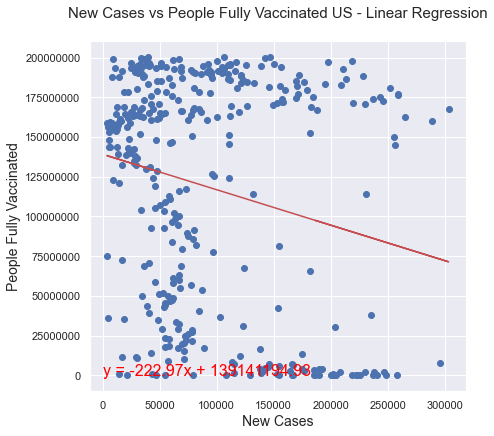

In [71]:
# US cases vs vaccination
plt.rcParams['figure.figsize'] = [6, 6]
x_values = US_df["new_cases"]
y_values = US_df["people_fully_vaccinated_y"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('New Cases', fontsize=14)
plt.ylabel('People Fully Vaccinated', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.title('New Cases vs People Fully Vaccinated US - Linear Regression', fontsize=15, y=1.05)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Cases vs People Fully Vaccinated US - Linear Regression 1", dpi='figure', bbox_inches="tight")
plt.show()

In [72]:
# find the total number of countries with more than 100,000 cases to date (27/11/21), GDP higher than 30000 
#and human development index hgher than 0.8
chigh=cv_nov.loc[(cv_nov['max_cases'] > 100000)&(cv_nov['gdp_per_capita'] > 30000)&(cv_nov['human_development_index'] > 0.8)]
print(chigh.count())
chigh

iso_code                   30
continent                  30
location                   30
date                       30
total_cases                30
                           ..
month                      30
year                       30
vaccination_per_hundred    30
cases_per_vaccination      30
max_deaths                 30
Length: 90, dtype: int64


iso_code      continent              location       date   total_cases  \
3213       AUS        Oceania             Australia 2021-11-27    207,984.00   
3560       AUT         Europe               Austria 2021-11-27  1,132,805.00   
4516       BHR           Asia               Bahrain 2021-11-27    277,552.00   
5822       BEL         Europe               Belgium 2021-11-27  1,701,633.00   
10062      CAN  North America                Canada 2021-11-27  1,792,561.00   
14407      CYP         Europe                Cyprus 2021-11-27    131,951.00   
14756      CZE         Europe               Czechia 2021-11-27  2,110,274.00   
15363      DNK         Europe               Denmark 2021-11-27    474,637.00   
19165      FIN         Europe               Finland 2021-11-27    182,284.00   
19513      FRA         Europe                France 2021-11-27  7,691,217.00   
20959      DEU         Europe               Germany 2021-11-27  5,780,814.00   
26869      IRL         Europe               Ireland 2021-11-27    556,319.00   
27541      ISR           Asia                Israel 2021-11-27  1,341,881.00   
27891      ITA         Europe                 Italy 2021-11-27  4,994,891.00   
28466      JPN           Asia                 Japan 2021-11-27  1,726,419.00   
30388      KWT           Asia                Kuwait 2021-11-27    413,266.00   
39511      NLD         Europe           Netherlands 2021-11-27  2,618,592.00   
41901      NOR         Europe                Norway 2021-11-27    259,200.00   
45351      QAT           Asia                 Qatar 2021-11-27    242,979.00   
48384      SAU           Asia          Saudi Arabia 2021-11-27    549,671.00   
49933      SGP           Asia             Singapore 2021-11-27    261,636.00   
50456      SVK         Europe              Slovakia 2021-11-27  1,143,068.00   
50805      SVN         Europe              Slovenia 2021-11-27    415,898.00   
51883      KOR           Asia           South Korea 2021-11-27    440,896.00   
52467      ESP         Europe                 Spain 2021-11-27  5,131,012.00   
53694      SWE         Europe                Sweden 2021-11-27  1,198,848.00   
54048      CHE         Europe           Switzerland 2021-11-27    986,834.00   
58379      ARE           Asia  United Arab Emirates 2021-11-27    741,858.00   
58714      GBR         Europe        United Kingdom 2021-11-27 10,165,779.00   
59078      USA  North America         United States 2021-11-27 48,204,567.00   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
3213    1,235.00            1,363.14      1,994.00        4.00   
3560   11,671.00           12,890.57     12,349.00       65.00   
4516       16.00               29.14      1,394.00        0.00   
5822        0.00           17,161.86     26,840.00        0.00   
10062   1,982.00            2,868.14     29,681.00       10.00   
14407       0.00              294.71        591.00        0.00   
14756  20,417.00           18,489.29     32,744.00      101.00   
15363   3,744.00            3,994.43      2,863.00       13.00   
19165       0.00            1,065.86      1,309.00        0.00   
19513  37,089.00           27,615.00    119,850.00       32.00   
20959  44,977.00           58,052.57    100,887.00      104.00   
26869   4,791.00            4,505.14      5,652.00        0.00   
27541     340.00              256.71      8,184.00        2.00   
27891  12,869.00           11,272.86    133,627.00       90.00   
28466     120.00              100.57     18,354.00        1.00   
30388      21.00               20.86      2,465.00        0.00   
39511  22,071.00           22,313.29     19,721.00       55.00   
41901   1,891.00            2,537.00      1,050.00        0.00   
45351     155.00              144.29        611.00        0.00   
48384      29.00               32.57      8,832.00        2.00   
49933   1,761.00            1,588.29        690.00        6.00   
50456  11,862.00           11,198.29     14,228.00       51.00   
50805  

In [73]:
dfsample = chigh.sample(frac=0.35)
print(dfsample.count())
print(dfsample["location"])

iso_code                   10
continent                  10
location                   10
date                       10
total_cases                10
                           ..
month                      10
year                       10
vaccination_per_hundred    10
cases_per_vaccination      10
max_deaths                 10
Length: 90, dtype: int64
4516                  Bahrain
26869                 Ireland
27891                   Italy
19513                  France
3213                Australia
58379    United Arab Emirates
30388                  Kuwait
49933               Singapore
19165                 Finland
10062                  Canada
Name: location, dtype: object


Selected countries
50805          Slovenia
53694            Sweden
58714    United Kingdom
20959           Germany
14756           Czechia
28466             Japan
27891             Italy
52467             Spain
39511       Netherlands
3560            Austria

In [74]:
# new cases selected countries
new_cases= cases_vaccination[(cases_vaccination['new_cases'] >= 0) & (cases_vaccination['new_vaccinations'] >= 0)& (cases_vaccination['people_fully_vaccinated_per_hundred_y'] >= 0)]

new_cases=new_cases[["total_cases", "cases_per_hundred", "gdp_per_capita", "vaccination_per_hundred", "max_deaths", "cases_per_vaccination", "population","date","new_cases", "location", "month","people_fully_vaccinated_per_hundred_y", "max_cases", "max_vaccinated" ]]

new_cases_s=new_cases.loc[(new_cases['location'] == "Slovenia")|(new_cases['location'] == "Sweden")|(new_cases['location'] == "United Kingdom")|(new_cases['location'] == "Germany")|(new_cases['location'] == "Czechia") |(new_cases['location'] == "Japan")|(new_cases['location'] == "Italy") | (new_cases['location'] == "Spain")|(new_cases['location'] == "Netherlands") |(new_cases['location'] == "Austria") ]

new_cases_sn=new_cases_s.loc[(new_cases_s["date"]=="2021-11-27")]

new_cases_sn

total_cases  cases_per_hundred  gdp_per_capita  \
3560   1,132,805.00              13.55       45,436.69   
14756  2,110,274.00              21.68       32,605.91   
20959  5,780,814.00               7.78       45,229.25   
27891  4,994,891.00               8.62       35,220.08   
28466  1,726,419.00               1.37       39,002.22   
39511  2,618,592.00              16.92       48,472.54   
50805    415,898.00              21.13       31,400.84   
52467  5,131,012.00              11.32       34,272.36   
53694  1,198,848.00              12.10       46,949.28   
58714 10,165,779.00              15.88       39,753.24   

       vaccination_per_hundred  max_deaths  cases_per_vaccination  \
3560                     68.07   13,143.00                   0.20   
14756                    60.39   34,377.00                   0.36   
20959                    68.91  105,642.00                   0.11   
27891                    73.35  134,765.00                   0.12   
28466                    77.70   18,369.00                   0.02   
39511                    74.37   20,530.00                   0.23   
50805                    56.27    5,394.00                   0.38   
52467                    80.66   88,381.00                   0.14   
53694                    71.46   15,191.00                   0.17   
58714                    68.48  146,844.00                   0.23   

          population       date  new_cases        location  month  \
3560    9,043,072.00 2021-11-27  11,671.00         Austria     11   
14756  10,724,553.00 2021-11-27  20,417.00         Czechia     11   
20959  83,900,471.00 2021-11-27  44,977.00         Germany     11   
27891  60,367,471.00 2021-11-27  12,869.00           Italy     11   
28466 126,050,796.00 2021-11-27     120.00           Japan     11   
39511  17,173,094.00 2021-11-27  22,071.00     Netherlands     11   
50805   2,078,723.00 2021-11-27   2,234.00        Slovenia     11   
52467  46,745,211.00 2021-11-27       0.00           Spain     11   
53694  10,160,159.00 2021-11-27       0.00          Sweden     11   
58714  68,207,114.00 2021-11-27  39,834.00  United Kingdom     11   

       people_fully_vaccinated_per_hundred_y     max_cases  max_vaccinated  
3560                                   65.64  1,225,555.00    6,155,945.00  
14756                                  59.15  2,325,181.00    6,476,944.00  
20959                                  67.94  6,528,894.00   57,811,831.00  
27891                                  72.91  5,206,305.00   44,281,676.00  
28466                                   0.00  1,727,925.00   97,941,682.00  
39511                                   0.00  2,905,742.00   12,772,175.00  
50805                                  55.15    439,169.00    1,169,645.00  
52467                                   0.00  5,290,273.00   37,702,839.00  
53694                                   0.00  1,229,217.00    7,260,558.00  
58714                                  67.90 10,833,033.00   46,705,196.00

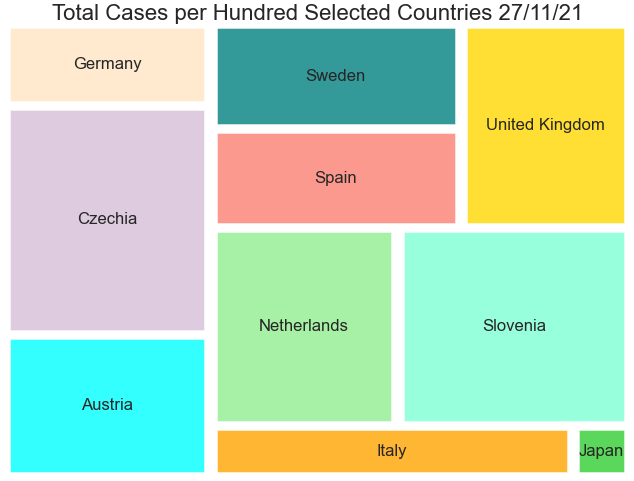

In [75]:
# use a treemap to vizualise the cases numbers in the selected countries
plt.figure(figsize=(18, 14), dpi=40)
plt.title('Total Cases per Hundred Selected Countries 27/11/21', fontsize=40)

plt.rc('font', size=30) 

color = ['aqua', 'thistle', 'bisque', 'orange', 'limegreen', 'lightgreen', 'aquamarine', 'salmon', 'teal', 'gold']
squarify.plot(sizes=new_cases_sn["cases_per_hundred"], color=color, label=new_cases_sn["location"], alpha=.8, pad = True)
plt.axis('off')
plt.savefig("DC Output/DC Figures/Fig DC Total Cases per Hundred Selected Countries 271121", dpi='figure')
plt.show()

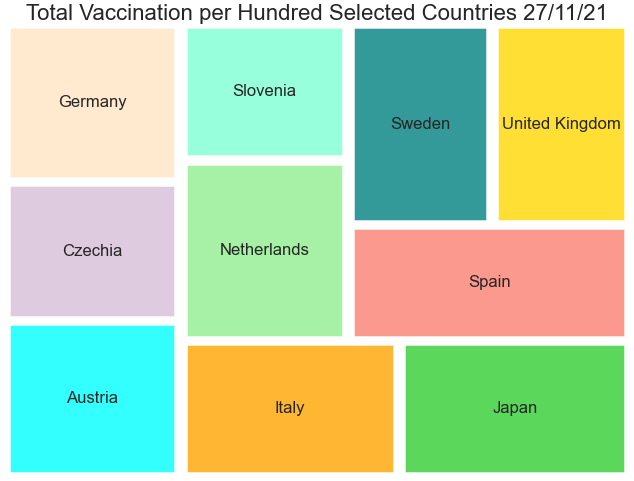

In [76]:
# use a treemap to vizualise the scale of cases numbers for the selected countries

plt.figure(figsize=(18, 14), dpi=40)
plt.title('Total Vaccination per Hundred Selected Countries 27/11/21', fontsize=40)

plt.rc('font', size=30) 

color = ['aqua', 'thistle', 'bisque', 'orange', 'limegreen', 'lightgreen', 'aquamarine', 'salmon', 'teal', 'gold']
squarify.plot(sizes=new_cases_sn["vaccination_per_hundred"], color=color, label=new_cases_sn["location"], alpha=.8, pad = True)
plt.axis('off')
plt.savefig("DC Output/DC Figures/Fig DC Total Vaccination per Hundred Selected Countries 271121", dpi='figure')
plt.show()


In [77]:
new_cases_sn

total_cases  cases_per_hundred  gdp_per_capita  \
3560   1,132,805.00              13.55       45,436.69   
14756  2,110,274.00              21.68       32,605.91   
20959  5,780,814.00               7.78       45,229.25   
27891  4,994,891.00               8.62       35,220.08   
28466  1,726,419.00               1.37       39,002.22   
39511  2,618,592.00              16.92       48,472.54   
50805    415,898.00              21.13       31,400.84   
52467  5,131,012.00              11.32       34,272.36   
53694  1,198,848.00              12.10       46,949.28   
58714 10,165,779.00              15.88       39,753.24   

       vaccination_per_hundred  max_deaths  cases_per_vaccination  \
3560                     68.07   13,143.00                   0.20   
14756                    60.39   34,377.00                   0.36   
20959                    68.91  105,642.00                   0.11   
27891                    73.35  134,765.00                   0.12   
28466                    77.70   18,369.00                   0.02   
39511                    74.37   20,530.00                   0.23   
50805                    56.27    5,394.00                   0.38   
52467                    80.66   88,381.00                   0.14   
53694                    71.46   15,191.00                   0.17   
58714                    68.48  146,844.00                   0.23   

          population       date  new_cases        location  month  \
3560    9,043,072.00 2021-11-27  11,671.00         Austria     11   
14756  10,724,553.00 2021-11-27  20,417.00         Czechia     11   
20959  83,900,471.00 2021-11-27  44,977.00         Germany     11   
27891  60,367,471.00 2021-11-27  12,869.00           Italy     11   
28466 126,050,796.00 2021-11-27     120.00           Japan     11   
39511  17,173,094.00 2021-11-27  22,071.00     Netherlands     11   
50805   2,078,723.00 2021-11-27   2,234.00        Slovenia     11   
52467  46,745,211.00 2021-11-27       0.00           Spain     11   
53694  10,160,159.00 2021-11-27       0.00          Sweden     11   
58714  68,207,114.00 2021-11-27  39,834.00  United Kingdom     11   

       people_fully_vaccinated_per_hundred_y     max_cases  max_vaccinated  
3560                                   65.64  1,225,555.00    6,155,945.00  
14756                                  59.15  2,325,181.00    6,476,944.00  
20959                                  67.94  6,528,894.00   57,811,831.00  
27891                                  72.91  5,206,305.00   44,281,676.00  
28466                                   0.00  1,727,925.00   97,941,682.00  
39511                                   0.00  2,905,742.00   12,772,175.00  
50805                                  55.15    439,169.00    1,169,645.00  
52467                                   0.00  5,290,273.00   37,702,839.00  
53694                                   0.00  1,229,217.00    7,260,558.00  
58714                                  67.90 10,833,033.00   46,705,196.00

In [78]:
new_cases_sn= new_cases_sn[["total_cases", "cases_per_hundred", "vaccination_per_hundred", "gdp_per_capita"]]

print(owid_world_c_df.corr().to_string())

                         new_cases  new_vaccinations  people_fully_vaccinated  new_deaths  total_deaths  total_cases
new_cases                     1.00              0.52                     0.33        0.84          0.68         0.66
new_vaccinations              0.52              1.00                     0.71        0.35          0.89         0.89
people_fully_vaccinated       0.33              0.71                     1.00        0.07          0.80         0.83
new_deaths                    0.84              0.35                     0.07        1.00          0.49         0.46
total_deaths                  0.68              0.89                     0.80        0.49          1.00         1.00
total_cases                   0.66              0.89                     0.83        0.46          1.00         1.00


In [79]:
# Japan dataframe for new cases
j_df=cases_vaccination.loc[cases_vaccination["location"]=='Japan']
j_new_cases=j_df["new_cases"]

The r-squared is: 5.086711028769178e-05


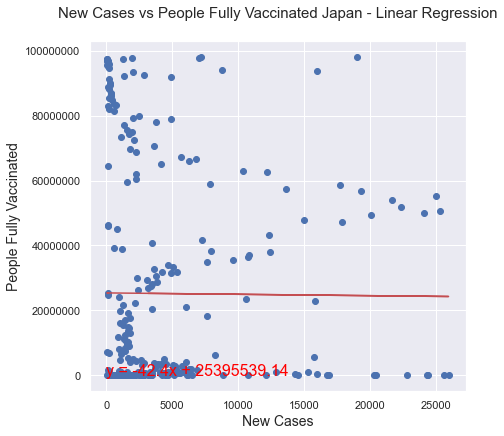

In [80]:
# Japan cases vs vaccination
plt.rcParams['figure.figsize'] = [6, 6]
x_values = j_df["new_cases"]
y_values = j_df["people_fully_vaccinated_y"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('New Cases', fontsize=14)
plt.ylabel('People Fully Vaccinated', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.title('New Cases vs People Fully Vaccinated Japan - Linear Regression', fontsize=15, y=1.05)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Cases vs People Fully Vaccinated Japan - Linear Regression", dpi='figure', bbox_inches="tight")
plt.show()

In [83]:
# Portugal dataframe
Portugal_df=cases_vaccination.loc[cases_vaccination["location"]=='Portugal']
Portugal_new_cases=Portugal_df["new_cases"]


The r-squared is: 0.009121531891561634


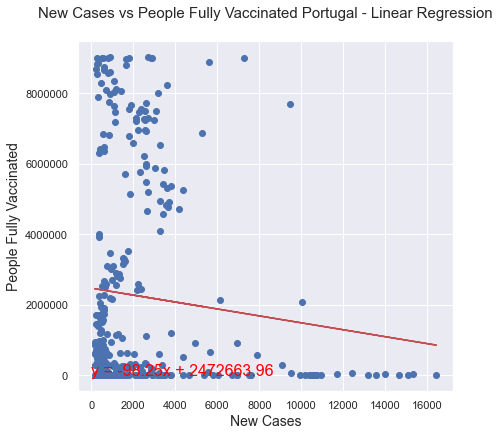

In [84]:
# find correlation between cases and vaccination for a country with high vaccination rate
plt.rcParams['figure.figsize'] = [6, 6]
x_values = Portugal_df["new_cases"]
y_values =Portugal_df["people_fully_vaccinated_y"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('New Cases', fontsize=14)
plt.ylabel('People Fully Vaccinated', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.title('New Cases vs People Fully Vaccinated Portugal - Linear Regression', fontsize=15, y=1.05)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Cases vs People Fully Vaccinated Portugal - Linear Regression", dpi='figure', bbox_inches="tight")
plt.show()

In [85]:
Australia_df=cases_vaccination.loc[cases_vaccination["location"]=='Australia']
Australia_new_cases=Australia_df["new_cases"]
Australia_df['Au_max_vaccin_per_month'] = Australia_df.groupby('month')["people_fully_vaccinated_per_hundred_x"].transform('max')
Australia_df['Au_sum_new_cases_per_month'] = Australia_df.groupby('month')["new_cases"].transform('sum')
Australia_df

<ipython-input-85-278a9d926c75>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-85-278a9d926c75>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



iso_code continent   location       date  total_cases  new_cases  \
2932      AUS   Oceania  Australia 2021-03-01    28,504.00      20.00   
2933      AUS   Oceania  Australia 2021-04-01    28,517.00      13.00   
2934      AUS   Oceania  Australia 2021-05-01    28,536.00      19.00   
2935      AUS   Oceania  Australia 2021-06-01    28,546.00      10.00   
2936      AUS   Oceania  Australia 2021-07-01    28,571.00      25.00   
...       ...       ...        ...        ...          ...        ...   
3221      AUS   Oceania  Australia 2021-07-12   222,260.00   1,705.00   
3222      AUS   Oceania  Australia 2021-08-12   223,914.00   1,654.00   
3223      AUS   Oceania  Australia 2021-09-12   225,625.00   1,711.00   
3224      AUS   Oceania  Australia 2021-10-12   227,382.00   1,757.00   
3225      AUS   Oceania  Australia 2021-11-12   228,925.00   1,543.00   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
2932               23.86        909.00        0.00                 0.00  ...   
2933               24.00        909.00        0.00                 0.00  ...   
2934               22.14        909.00        0.00                 0.00  ...   
2935               20.14        909.00        0.00                 0.00  ...   
2936               20.86        909.00        0.00                 0.00  ...   
...                  ...           ...         ...                  ...  ...   
3221            1,515.00      2,072.00        7.00                 8.71  ...   
3222            1,508.14      2,082.00       10.00                 8.71  ...   
3223            1,535.14      2,084.00        2.00                 7.29  ...   
3224            1,542.14      2,100.00       16.00                 8.29  ...   
3225            1,584.14      2,104.00        4.00                 7.71  ...   

      max_cases  max_vaccinated  cases_per_hundred  month  year  \
2932 228,925.00   19,262,415.00               0.89      3  2021   
2933 228,925.00   19,262,415.00               0.89      4  2021   
2934 228,925.00   19,262,415.00               0.89      5  2021   
2935 228,925.00   19,262,415.00               0.89      6  2021   
2936 228,925.00   19,262,415.00               0.89      7  2021   
...         ...             ...                ...    ...   ...   
3221 228,925.00   19,262,415.00               0.89      7  2021   
3222 228,925.00   19,262,415.00               0.89      8  2021   
3223 228,925.00   19,262,415.00               0.89      9  2021   
3224 228,925.00   19,262,415.00               0.89     10  2021   
3225 228,925.00   19,262,415.00               0.89     11  2021   

      vaccination_per_hundred  cases_per_vaccination  max_deaths  \
2932                    74.69                   0.01    2,104.00   
2933                    74.69                   0.01    2,104.00   
2934                    74.69                   0.01    2,104.00   
2935                    74.69                   0.01    2,104.00   
2936                    74.69                   0.01    2,104.00   
...                       ...                    ...         ...   
3221                    74.69                   0.01    2,104.00   
3222                    74.69                   0.01    2,104.00   
3223                    74.69                   0.01    2,104.00   
3224                    74.69                   0.01    2,104.00   
3225                    74.69                   0.01    2,104.00   

      Au_max_vaccin_per_month  Au_sum_new_cases_per_month  
2932                    73.53                    7,554.00  
2933                    73.64                    7,694.00  
2934                    73.71                    6,954.00  
2935                    73.89                    7,340.00  
2936                    74.07                   10,644.00  
...                       ...                         ...  
3221                    74.07                   10,644.00  
3222                    74.26                   24,519.00  
3223 

The r-squared is: 0.06553315778975147


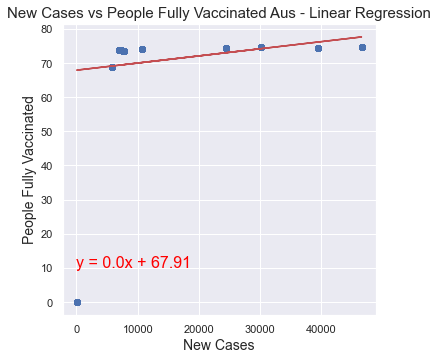

In [86]:
# Australia cases vs vaccination
plt.rcParams['figure.figsize'] = [5, 5]
x_values = Australia_df["Au_sum_new_cases_per_month"]
y_values = Australia_df["Au_max_vaccin_per_month"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('New Cases', fontsize=14)
plt.ylabel('People Fully Vaccinated', fontsize=14)
plt.title('New Cases vs People Fully Vaccinated Aus - Linear Regression', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Cases vs People Fully Vaccinated Australia - Linear Regression 1", dpi='figure', bbox_inches="tight")
plt.show()